## Preliminaries

In [1]:
%autosave 0

Autosave disabled


In [2]:
"""
import all necessary libraries
"""

import os,sys
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
import scipy.constants as sc
import numpy as np
import math as mt
import cmath as cm
from scipy.optimize import *
from mpmath import *
from scipy.optimize import curve_fit

## INITIALIZATION

In [3]:
"""
geometric unit converter (G=c=1)
To convert geometric unit → SI, multiply by factor. 
To convert SI → geometric unit, divide by factor.
"""
#constants
Ms = 1.98840987e+30 # Solar mass
Ls = 3.828e+26 # Solar luminosity in W
c = sc.c      # Speed of light in vacuum
G = sc.G      # Gravitational constant
ϵ0 = sc.epsilon_0   # Vacuum electric permittivity

#Conversion Factors, mass, time, length and energy in units of mass
cM = Ms  #mass to solar mass factor (m)
cT = Ms*G*(c**(-3))  #mass to time factor (sec)
cL = Ms*G*(c**(-2))  #mass to length factor (m)
cE = Ms*c**2 #energy
cP = c**5/G # luminosity or Poynting Flux
cB = 1e+4*(c**3)/(G*Ms*((G*ϵ0)**(1/2))) # magnetic filed in Gauss

In [4]:
"""USER INPUTS"""

MTPNf = 3455 #2785 #1910 # untill the ODE becomes stiff
"""
we denote the first star with A and the second with B
"""
m = 2.8 #masses[0]
q = 1   #masses[1]


mA = m/(1+q)   #mass of star 1
mB = m-mA #mass of star 2 (conservation)
μ = ((mA*mB)/(mA+mB)) #reduced mass
η = μ/m #symmetric mass ratio - unitless


#radii = list(map(float, input("Enter the radii of the stars in a single line separated by space: ").split()))  
rA = 11.5 #radii[0]*1000 # radius NS A in km
rB = 11.5 #radii[1]*1000 # radius NS A in km

R0  = 42 #39.9999      #initial separation between the centers of mass in geometric units
r0  = R0*cL/1000   #initial separation between the centers of mass in km
fLR = 2.10 # Light Ring Factor: Tune to Change the Matching

print ("mA = ", mA)
print ("mB = ", mB)
print ("μ,η  = ", μ,η)
print ("mass rescaled mA, mB = ", mA/m, mB/m)
print("")
print("initial separation in km =",r0) 
print("initial separation in code units =",R0) 
print ("mass rescaled initial separation (code units) = ",R0/m)

mA =  1.4
mB =  1.4
μ,η  =  0.7 0.25
mass rescaled mA, mB =  0.5 0.5

initial separation in km = 62.01825157633313
initial separation in code units = 42
mass rescaled initial separation (code units) =  15.000000000000002


In [5]:
#Import .py containing all modularized code
import MAINLOGIC_V2
#import inspiral class 
from MAINLOGIC_V2 import BBHinspiral as ins
#initialize inspiral class with all global variables
a=globals()
ins.initialize(a)

xPN last =  0.29888611464582016


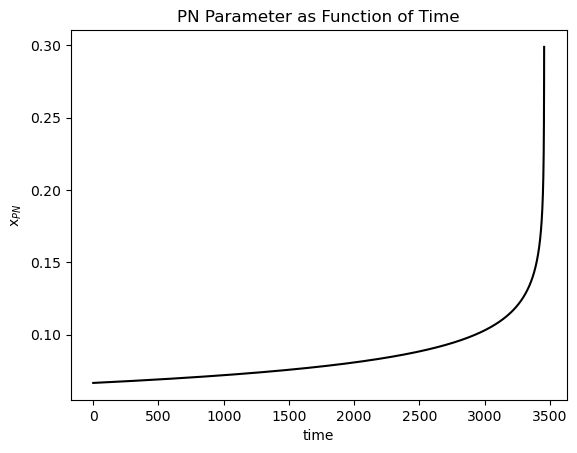

In [6]:
#compute x(t)=(v(t)/c)^2 
xPNarr=ins.XPN()
globals().update(ins.retrievequantities())

# plot x(t)agaist corresponding "tPNarr" values 
#plt.rcParams.update({'font.size': 14})  # increase the font size
plt.title("PN Parameter as Function of Time")
plt.xlabel("time")
plt.ylabel("x$_{PN}$")
plt.plot(MtPNarr,xPNarr,'k')
#sanity check
print("xPN last = ", xPNarr[len(MtPNarr)-1])

In [7]:
"""Velociy as a Function of Time"""
ins.vPN()
globals().update(ins.retrievequantities())

print("v last = ", (xPNarr[len(MtPNarr)-1])**(1/2))

v last =  0.546704778327225


In [8]:
"""
Radial Separation as a function of time (in geometric units)
"""
#define expansion coeff.'s

ins.rPN()
globals().update(ins.retrievequantities())

#sanity check
print("rPN last = ", rPNarr[len(MtPNarr)-1])

rPN last =  2.6010052644238195


In [9]:
ins.Times()
globals().update(ins.retrievequantities())
print("indexes:")
print("numT=",numT,",","numLR=",numLR,",","numX=",numX)
print("")
#sanity check
print("Last point",rPNarr[numL],[MtPNarr[numL]])
print("light ring",(rPNarr[numLR]),[MtPNarr[numLR]] )
print("surfaces touch",(rPNarr[numT]),[MtPNarr[numT]])
print("xPN LR => ",xPNarr[numLR])
print("rPN for xLR = 0.25 => ",rPNarr[numX])

indexes:
numT= 34124 , numLR= 34469 , numX= 34537

Last point 2.6010052644238195 [3455.0]
light ring 4.203862737465731 [3446.9]
surfaces touch 5.559292189404415 [3412.4]
xPN LR =>  0.20145087245640558
rPN for xLR = 0.25 =>  3.2525102075179504


In [10]:
"""
PN angular frequency (from Keplers law in geometric units, x^3/2)
"""
ins.MΩPN()
globals().update(ins.retrievequantities())

print("frequency for last point",MΩPNarr[numL])
print("frequency for surface touch",MΩPNarr[numT])
print("frequency for light ring=4",MΩPNarr[numLR])
print("frequency for light ring=3.25",MΩPNarr[numX])

frequency for last point 0.16340246705252864
frequency for surface touch 0.06265551103972383
frequency for light ring=4 0.09041775692545605
frequency for light ring=3.25 0.12499724755878967


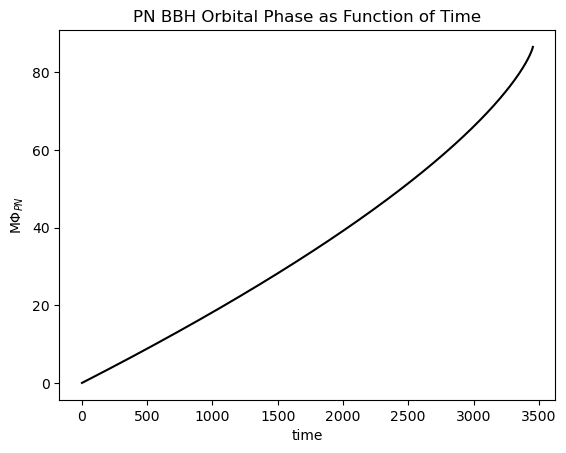

In [11]:
"Orbital Phase"
ins.MΦPN()
globals().update(ins.retrievequantities())

# Plotting the orbital phase
plt.title("PN BBH Orbital Phase as Function of Time")
plt.xlabel("time")
plt.ylabel("MΦ$_{PN}$")
plt.plot(MtPNarr,MΦPNarr,'k')

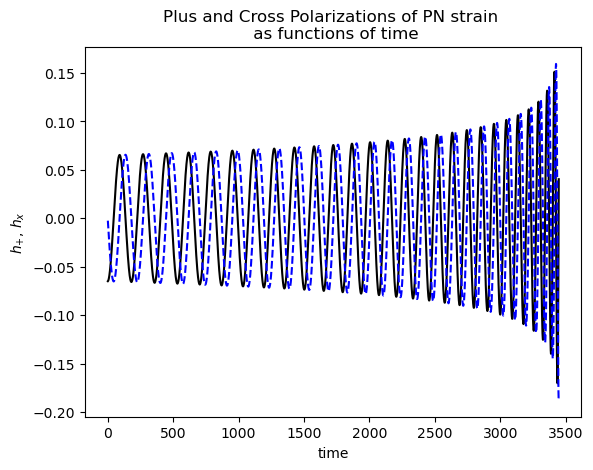

In [12]:
"""
Building the PN Amplitude and Strain: attention, this is for BBH!
"""
ins.Waveform()
globals().update(ins.retrievequantities())

#plot hplus and hcross up to the light ring
plt.title("Plus and Cross Polarizations of PN strain \n as functions of time")
plt.xlabel("time")
plt.ylabel("$h_{+}$, $h_{x}$")
plt.plot(MtPNarr[t0:numLR],hplusPNarr[t0:numLR],color='black',linewidth=1.5)
plt.plot(MtPNarr[t0:numLR],hcrosPNarr[t0:numLR],linestyle='dashed', color='blue',linewidth=1.5)

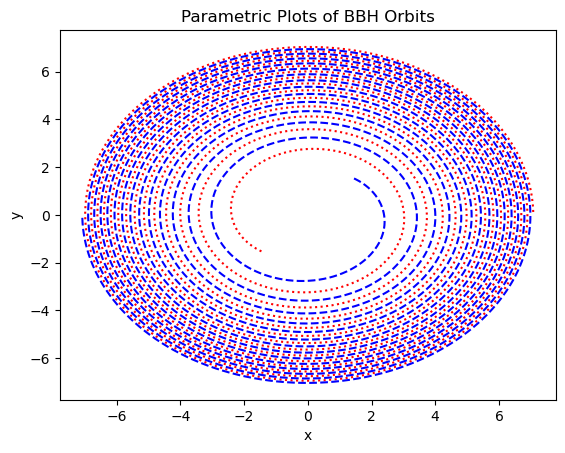

In [13]:
"""
Individual orbits, must use the orbital phase
"""
ins.Orbits()
globals().update(ins.retrievequantities())

#plot the Orbits
plt.title("Parametric Plots of BBH Orbits")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(rAPNxarr[t0:numLR],rAPNyarr[t0:numLR],linestyle='dotted', color='red',linewidth=1.5)
plt.plot(rBPNxarr[t0:numLR],rBPNyarr[t0:numLR],linestyle='dashed', color='blue',linewidth=1.5)

## Building the Merger, BBH
Rescaled with mass (mass normalized to 1)

In [14]:
"""
initialization and calculation of initial values
frequencies: capital letters for orbital quantities, 
lowercase for GW quantities l=m=2
"""
##Values taken from fit with numerical data
χf  = 0.69 #estimated final spin of resulting black hole
χNS  = 2.1e-3 #estimated initial spin of neutron stars black hole
q1, q2, q3  = 0.7, 1.4187, -0.499 # coefficients Q22
f1, f2, f3 = 1.5251, -1.1568, 0.1292 # coefficients Ω22b
E0, E2, E4 = 0.048332, 0.000743, 0.000124 # coefficients EGW
## note that the NS will eject mass during the collision as well! 
##We can estimate disk mass at 20% of the total mass mass of the neutron star
MD = 0.1 #0.02 #estimated ejected/disk mass

from MAINLOGIC_V2 import BBHmerger as mer
a=globals()
mer.initialize(a)
globals().update(mer.retrievequantities())

#initialization sanity check 
print("Mf = ", Mf)
print("Q22QNM =",Q22QNM)
print("Ω22QNM =",Ω22QNM)
print("τ =",τ)

Mf =  0.851668
Q22QNM = 3.2450779217207257
Ω22QNM = 0.6231809640517877
τ = 10.41456048535864


In [15]:
#Orbital Freq
mer.MΩBoB()
globals().update(mer.retrievequantities())

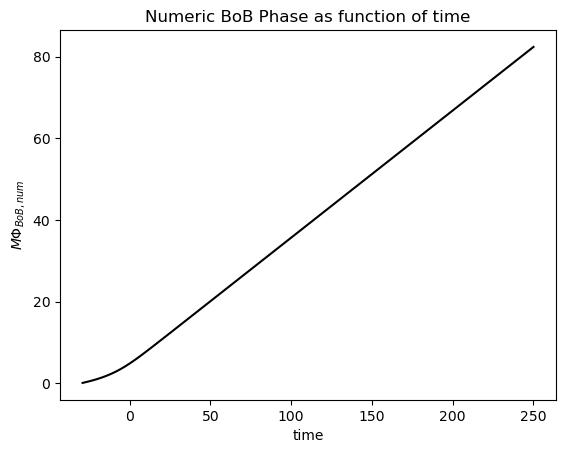

In [16]:
"""Phase"""
mer.MΦBoB()
globals().update(mer.retrievequantities())


plt.title("Numeric BoB Phase as function of time")
plt.xlabel("time")
plt.ylabel("$M\Phi_{BoB,num}$")
plt.plot(MtBoBarr,MΦBoBnumarr,'k')

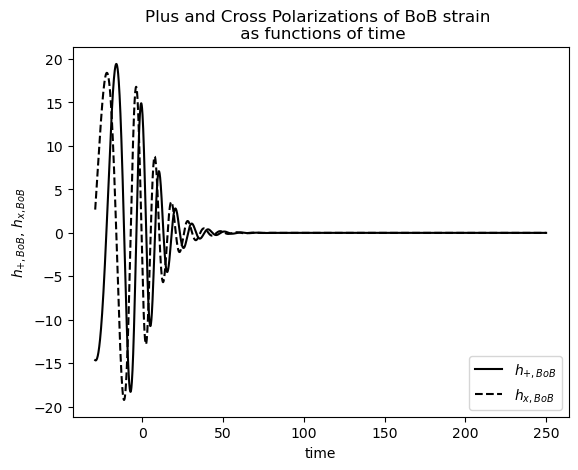

In [17]:
"""
Calculate the Strain
"""
mer.Waveform()
globals().update(mer.retrievequantities())

plt.title("Plus and Cross Polarizations of BoB strain \n as functions of time")
plt.plot(MtBoBarr, hplusBoBarr,'k')
plt.plot(MtBoBarr, hcrosBoBarr,linestyle='dashed', color='black',linewidth=1.5)
plt.xlabel("time")
plt.ylabel("$h_{+,BoB}$, $h_{x,BoB}$")
plt.legend(("$h_{+,BoB}$","$h_{x,BoB}$"),loc="lower right")

## Hybrid Waveform

We shift the time for the PN and BoB to correspond to 0 at the time the stars touch, to match them.

In [18]:
from MAINLOGIC_V2 import BBHhybrid as hyb

In [19]:
a=globals()
hyb.initialize(a)

globals().update(hyb.retrievequantities())

In [20]:
#orbital phase
hyb.Mϕhyb()
globals().update(hyb.retrievequantities())

In [21]:
#orbital freq
hyb.Mωhyb()
globals().update(hyb.retrievequantities())

In [22]:
#hyb PN parameter
hyb.Xhyb()
globals().update(hyb.retrievequantities())

In [23]:
#hybrid separation
hyb.Rhyb()
globals().update(hyb.retrievequantities())

In [24]:
#Complete Orbits
hyb.Orbits()
globals().update(hyb.retrievequantities())

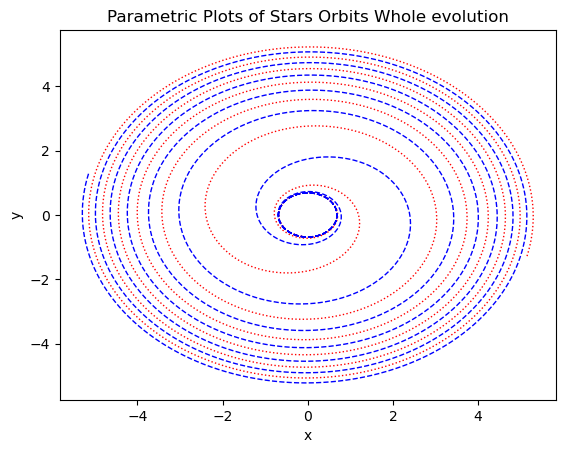

In [25]:
#plot the starts orbits as they inspiral
plt.title("Parametric Plots of Stars Orbits Whole evolution")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(rAhybxarr[numLR-10000:numLR+1000],rAhybyarr[numLR-10000:numLR+1000],linestyle='dotted', color='red',linewidth=1)
plt.plot(rBhybxarr[numLR-10000:numLR+1000],rBhybyarr[numLR-10000:numLR+1000],linestyle='dashed', color='blue',linewidth=1)

In [26]:
#form the normalized hybrid amplitude
hyb.Normalized_Amp()
globals().update(hyb.retrievequantities())

In [27]:
#shift the hybrid time array to set 0 at merger (the maximum amplitude)
#Building hybrid time array 
hyb.translated_time()
globals().update(hyb.retrievequantities())

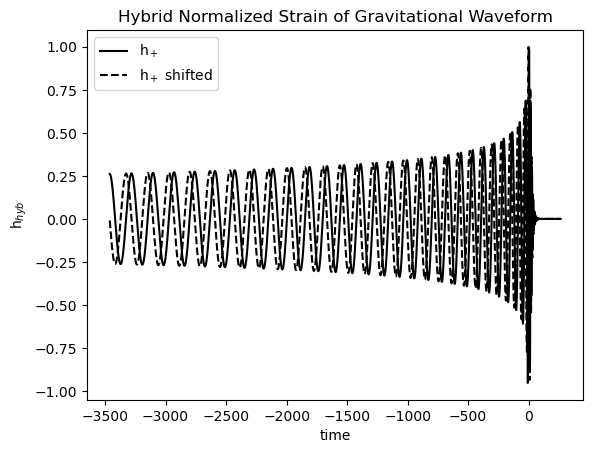

In [28]:
#Finally, form the strain of the gravitational waves
hyb.Waveform()
globals().update(hyb.retrievequantities())

#plot the hybrid strain
plt.title("Hybrid Normalized Strain of Gravitational Waveform")
plt.plot(MtarrhybM,hplushybarr, 'k')
plt.plot(MtarrhybM,hcroshybarr, linestyle='dashed', color='black',linewidth=1.5)
plt.xlabel("time")
plt.ylabel("h$_{hyb}$") 
plt.legend(("h$_+$","h$_+$ shifted","total strain/modulus"),loc="upper left")

### Compare with SXS numerical BBH

In [29]:
from MAINLOGIC_V2 import SXSBBH 

In [30]:
#upload the necessary data
BBHAmp_raw = np.genfromtxt('AmpBBH0180_raw.dat', unpack=True)
BBHϕ_raw = np.genfromtxt('ϕBBH0180_raw.dat', unpack=True)
BBHh22_raw = np.genfromtxt('h22BBH0180_raw.dat', unpack=True)

#reading the arrays separately
BBHTime = BBHAmp_raw[0,:]
BBHAmp = BBHAmp_raw[1,:]
BBHϕ = BBHϕ_raw[1,:]
BBHh22plus = BBHh22_raw[1,:]

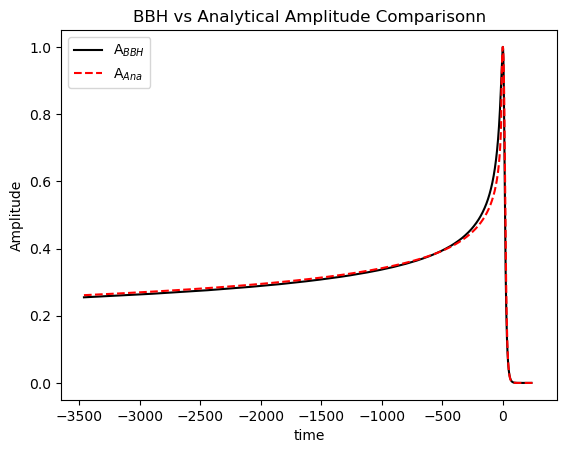

In [31]:
a=globals()
SXSBBH.initialize(a)
globals().update(SXSBBH.retrievequantities())

SXSBBH.align()
globals().update(SXSBBH.retrievequantities())

#plot the hybrid amplitude vs SXS
plt.title("BBH vs Analytical Amplitude Comparisonn")
plt.plot(BBHTime[BBHi0:BBHiF],BBHAmp[BBHi0:BBHiF], 'k')
plt.plot(MtarrhybM,Amphybarr, linestyle='dashed', color='red',linewidth=1.5)
plt.xlabel("time")
plt.ylabel("Amplitude") 
plt.legend(("A$_{BBH}$","A$_{Ana}$"),loc="upper left")

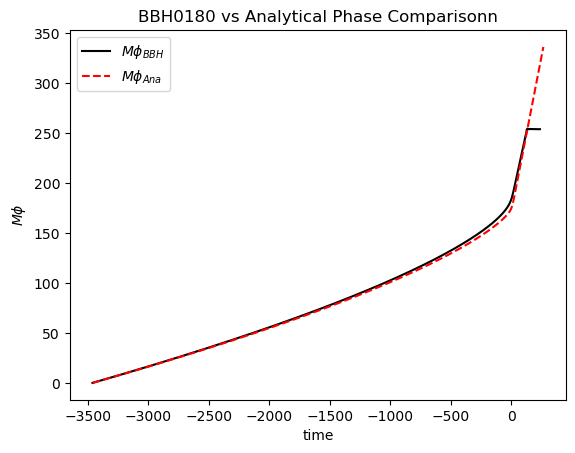

In [32]:
#plot the hybrid phase vs SXS
plt.title("BBH0180 vs Analytical Phase Comparisonn")
plt.plot(BBHTime[BBHi0:BBHiF],BBHϕ[BBHi0:BBHiF]-BBHϕ[BBHi0], 'k')
plt.plot(MtarrhybM,Mϕhybarr-Mϕhybarr[0], linestyle='dashed', color='red',linewidth=1.5)
plt.xlabel("time")
plt.ylabel("$M\phi$") 
plt.legend(("$M\phi_{BBH}$","$M\phi_{Ana}$"),loc="upper left")

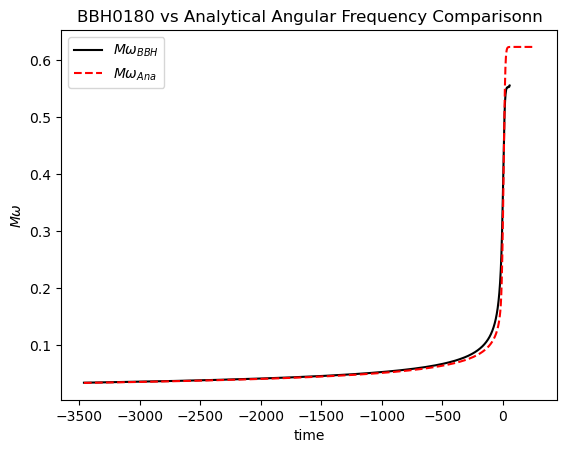

In [33]:
SXSBBH.MωBBH()
SXSBBH.MωdotBBH()
"""
MωdotBBHarr
MωBBHarr"""
globals().update(SXSBBH.retrievequantities())

#plot the hybrid angular frequency vs SXS
plt.title("BBH0180 vs Analytical Angular Frequency Comparisonn")
plt.plot(BBHTime[BBHi0:BBHiF-1800],MωBBHarr[0:-1800], 'k')
plt.plot(MtarrhybM,Mωhybarr, linestyle='dashed', color='red',linewidth=1.5)
plt.xlabel("time")
plt.ylabel("$M\omega$") 
plt.legend(("$M\omega_{BBH}$","$M\omega_{Ana}$"),loc="upper left")

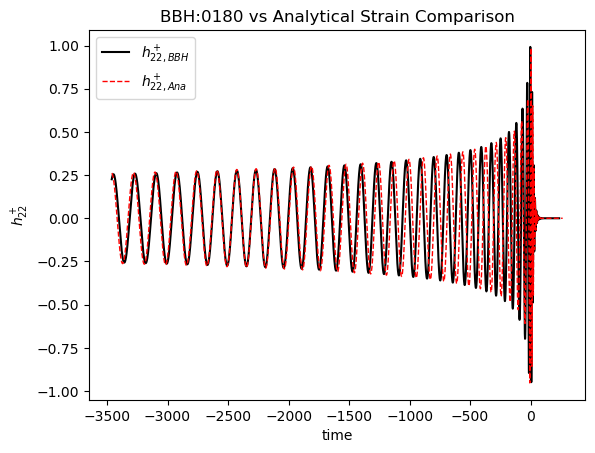

In [34]:
#compare the strains
BBHh22plus = BBHh22_raw[1,:]

#plot the hybrid strain vs aligned SXS
plt.title("BBH:0180 vs Analytical Strain Comparison")
#plt.plot(BBHTime[BBHi0:BBHiF]-Δt0,BBHh22plus[BBHi0:BBHiF], 'k')
plt.plot(BBHTime[BBHi0:BBHiF],BBHh22plus[BBHi0:BBHiF], 'k')
plt.plot(MtarrhybM, hplushybarr, linestyle='dashed', color='red',linewidth=1)
plt.xlabel("time")
plt.ylabel("$h^+_{22}$") 
plt.legend(("$h^+_{22,BBH}$","$h^+_{22,Ana}$"),loc="upper left")


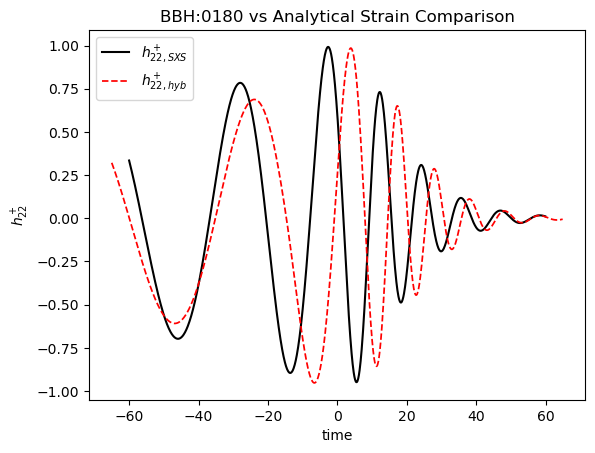

In [35]:
#plot the hybrid strain vs aligned SXS around merger
plt.title("BBH:0180 vs Analytical Strain Comparison")
plt.plot(BBHTime[BBHiM-600:BBHiM+600], BBHh22plus[BBHiM-600:BBHiM+600], 'k')
plt.plot(MtarrhybM[numM-650:numM+650],hplushybarr[numM-650:numM+650], linestyle='dashed', color='red',linewidth=1.25)
plt.xlabel("time")
plt.ylabel("$h^+_{22}$") 
plt.legend(("$h^+_{22,SXS}$","$h^+_{22,hyb}$"),loc="upper left")


0.03482238168084156 0.0344265186329548
-3346.4 -3461.1445044425845 114.74450444258446


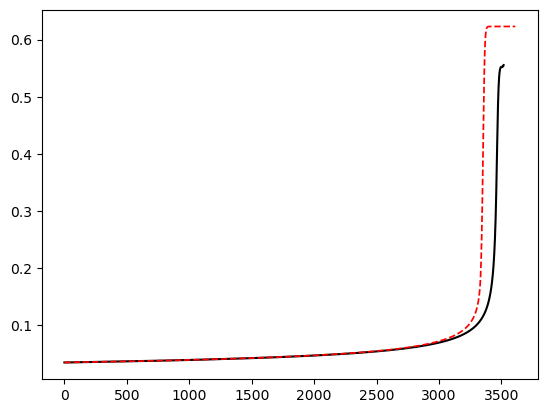

In [36]:
#location of matching frequencies BBH SXS and BBH hybrid  
print(MωBBHarr[0],Mωhybarr[0] )
for i in range(len(Mωhybarr)):
    if (0.9999 < Mωhybarr[i]/MωBBHarr[0] < 1.0001):
        iTrefω = i
ΔTref = MtarrhybM[iTrefω]-BBHTime[BBHi0]
print(MtarrhybM[iTrefω],BBHTime[BBHi0],ΔTref)

plt.plot(BBHTime[BBHi0:BBHiF-1800]-BBHTime[BBHi0],MωBBHarr[0:-1800], 'k')
plt.plot(MtarrhybM[iTrefω:]-MtarrhybM[iTrefω],Mωhybarr[iTrefω:], linestyle='dashed', color='red',linewidth=1.25)
#plt.plot(MtarrhybM+ΔTref,Mωhybarr, linestyle='dotted', color='blue',linewidth=1.5)

3.9000000000000554


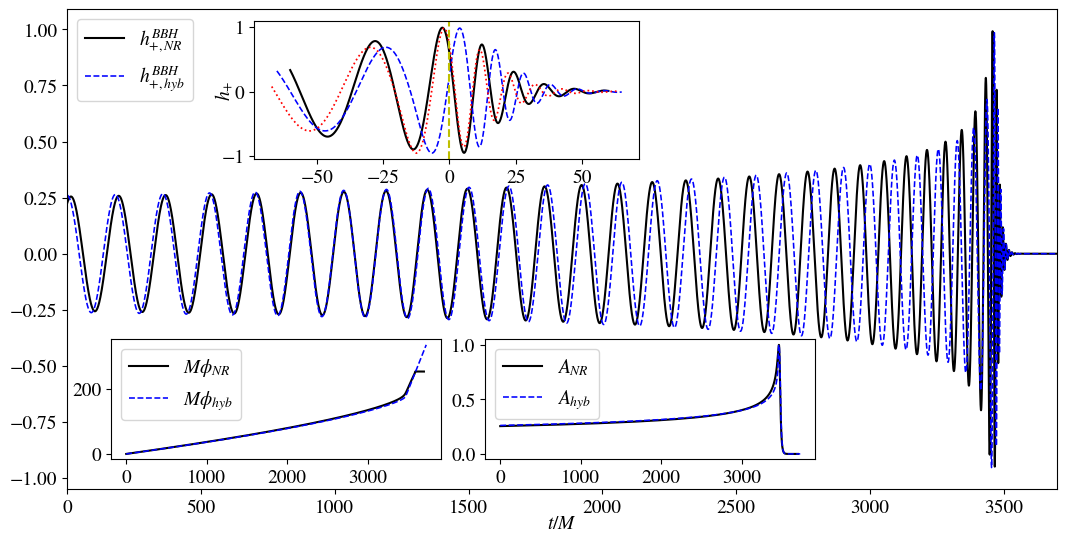

In [37]:
#Paper-quality plots
import matplotlib
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(11, 6))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.27, 0.65, 0.35, 0.23]) # inset axes
axes3 = fig.add_axes([0.14, 0.15, 0.30, 0.20]) # inset axes
axes4 = fig.add_axes([0.48, 0.15, 0.30, 0.20]) # inset axes
#rΔTref
# main figure
axes1.plot(BBHTime[BBHi0:BBHiF]-BBHTime[BBHi0],BBHh22plus[BBHi0:BBHiF], 'k', label=r"$h^{BBH}_{+,NR}$")
axes1.plot(MtarrhybM-MtarrhybM[0], hplushybarr, linestyle='dashed', color='blue',linewidth=1.15,label=r"$h^{BBH}_{+,hyb}$")
axes1.set_xlabel('$t/M$',labelpad=-1)
axes1.set_xlim(0,3700)
#axes1.set_ylabel('$strain$',labelpad=-10)
axes1.legend(loc=2)
#axes1.set_title('strain')

# the hybrid strain peak is displaced
mrgAnahi=np.where(hplushybarr==np.max(hplushybarr))[0][0]
ΔThybM = MtarrhybM[mrgAnahi]-MtarrhybM[numM]
print(ΔThybM)
# insert
axes2.plot(BBHTime[BBHiM-600:BBHiM+600]-BBHTime[BBHiM], BBHh22plus[BBHiM-600:BBHiM+600], 'k')
axes2.plot(MtarrhybM[numM-650:numM+650]-MtarrhybM[numM],hplushybarr[numM-650:numM+650], linestyle='dashed', color='blue',linewidth=1.15)
axes2.plot(MtarrhybM[mrgAnahi-650:mrgAnahi+650]-MtarrhybM[mrgAnahi]-ΔThybM/2,hplushybarr[mrgAnahi-650:mrgAnahi+650], linestyle='dotted', color='red',linewidth=1.25)
axes2.set_ylabel("$h_{+}$",labelpad=-10)
axes2.axvline(x=BBHTime[BBHiM], color='y', ls='--')

axes3.plot(BBHTime[BBHi0:BBHiF]-BBHTime[BBHi0],BBHϕ[BBHi0:BBHiF]-BBHϕ[BBHi0], 'k',label=r"$M\phi_{NR}$")
axes3.plot(MtarrhybM-MtarrhybM[0],Mϕhybarr-Mϕhybarr[0],linestyle='dashed', color='blue',linewidth=1.15,label=r"$M\phi_{hyb}$")
axes3.legend(loc=2)
#axes3.set_title('Phase Comparison');

axes4.plot(BBHTime[BBHi0:BBHiF]-BBHTime[BBHi0],BBHAmp[BBHi0:BBHiF], 'k',label=r"$A_{NR}$")
axes4.plot(MtarrhybM-MtarrhybM[0],Amphybarr, linestyle='dashed', color='blue',linewidth=1.15,label=r"$A_{hyb}$")
axes4.legend(loc=2)
#axes4.set_title('Amplitude Comparison');

#fig.savefig("BBHhcomp.eps")
#fig.savefig("BBHhcomp.pdf")

#fig.savefig("Figure1.eps",bbox_inches='tight')

In [38]:
from MAINLOGIC_V2 import BBHvsBNS 

#maybe we must rescale the BNS by the masses???
m1 =2.8
m2 = 2.7
#masses for SXS data (won't change so can hardcode)

#upload the SXS BNS0001 data, for G2 EOS
BNS1Amp_raw = np.genfromtxt('AmpBNS0001_raw.dat', unpack=True)
BNS1ϕ_raw = np.genfromtxt('ϕBNS0001_raw.dat', unpack=True)
BNS1h22_raw = np.genfromtxt('h22BNS0001_raw.dat', unpack=True)

#reading the arrays separately for BNS1
BNS1Time = BNS1Amp_raw[0,:]
BNS1Amp = BNS1Amp_raw[1,:]
BNS1ϕ = BNS1ϕ_raw[1,:]
BNS1h22plus = BNS1h22_raw[1,:]

#upload the SXS BNS0002 data, for MP1b EOS
BNS2Amp_raw = np.genfromtxt('AmpBNS0002_raw.dat', unpack=True)
BNS2ϕ_raw = np.genfromtxt('ϕBNS0002_raw.dat', unpack=True)
BNS2h22_raw = np.genfromtxt('h22BNS0002_raw.dat', unpack=True)

#reading the arrays separately for BNS2
BNS2Time = BNS2Amp_raw[0,:]
BNS2Amp = BNS2Amp_raw[1,:]
BNS2ϕ = BNS2ϕ_raw[1,:]
BNS2h22plus = BNS2h22_raw[1,:]

a=globals()
BBHvsBNS.initialize(a)
globals().update(BBHvsBNS.retrievequantities())

In [39]:
BBHvsBNS.align()
globals().update(BBHvsBNS.retrievequantities())

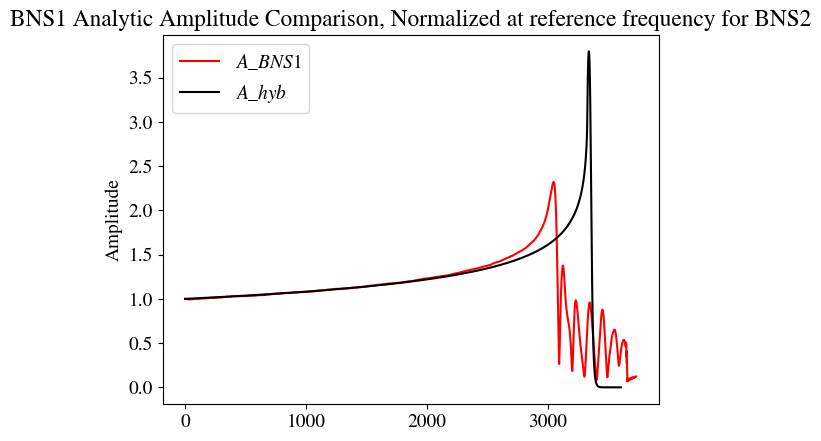

In [40]:
#scale the amplitudes with the reference phase amplitude of BBH
# plot the Amplitude BNS for SXS data after scaling at reference frequency for BNS1 and compare with analytic BBH
plt.title("BNS1 Analytic Amplitude Comparison, Normalized at reference frequency for BNS2")
plt.plot(BNS1Time[TrefBNS1:-1]-BNS1Time[TrefBNS1] ,BNS1Ampref[TrefBNS1:-1], 'r')
plt.plot(MtarrhybM[numBNS1ref:-1] -MtarrhybM[numBNS1ref],Amphyb1ref[numBNS1ref:-1], 'k')
#plt.plot(MtarrhybM[numωBNS1ref:-1] -MtarrhybM[numωBNS1ref],Amphyb1ωref[numωBNS1ref:-1], '--k')
plt.ylabel("Amplitude") 
plt.legend(("$A\_{BNS1}$", "$A\_{hyb}$"),loc="upper left")

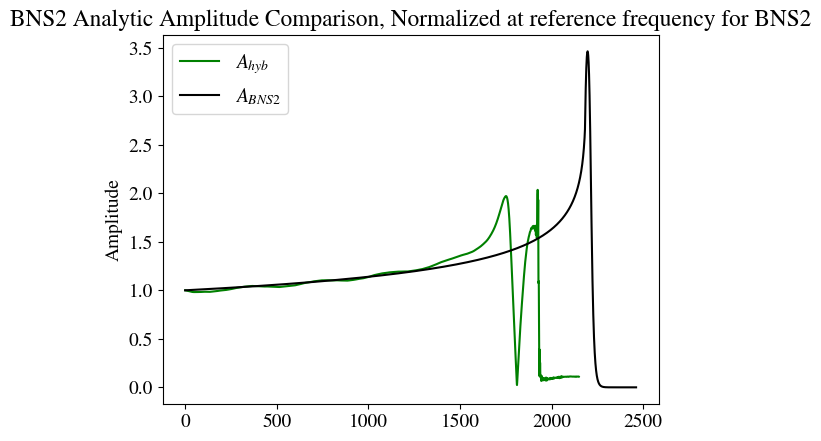

In [41]:
# plot the Amplitude BNS for SXS data after normalizing at reference frequency for BNS2
plt.title("BNS2 Analytic Amplitude Comparison, Normalized at reference frequency for BNS2")
plt.plot(BNS2Time[TrefBNS2:-1]-BNS2Time[TrefBNS2] ,BNS2Ampref[TrefBNS2:-1], 'g')
plt.plot(MtarrhybM[numBNS2ref:-1] -MtarrhybM[numBNS2ref],Amphyb2ref[numBNS2ref:-1], 'k')
plt.ylabel("Amplitude") 
plt.legend(("$A_{hyb}$","$A_{BNS2}$"),loc="upper left")

In [42]:
BBHvsBNS.matchphase()
globals().update(BBHvsBNS.retrievequantities())

In [43]:
BBHvsBNS.matchAmp()
globals().update(BBHvsBNS.retrievequantities())

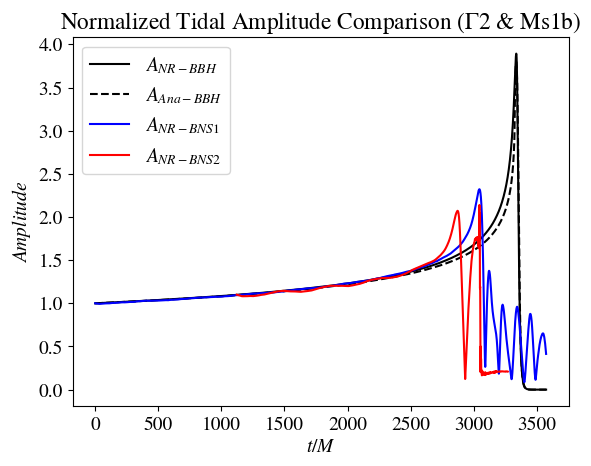

In [44]:
# plot the Amplitude differences BNS matched at start 
plt.title("Normalized Tidal Amplitude Comparison ($\Gamma$2 & Ms1b)")
plt.plot(BNS1Tshift, BBH1Ampintarr/BBH1Ampintarr[0], 'k')
plt.plot(BNS1Tshift, AnaBBH1Aintarr/AnaBBH1Aintarr[0], '--k')
plt.plot(BNS1Tshift, BNS1Ampintarr/BNS1Ampintarr[0], 'b')
plt.plot(BNS2Tshift+ΔTrefBNS12, BNS2Ampintarr/BNS2Ampintarr[0]+ΔArefBNS12, 'r')
plt.xlabel("$t/M$")
plt.ylabel("$Amplitude$") 
plt.legend(("$A_{NR-BBH}$","$A_{Ana-BBH}$", "$A_{NR-BNS1}$", "$A_{NR-BNS2}$"),loc="upper left")

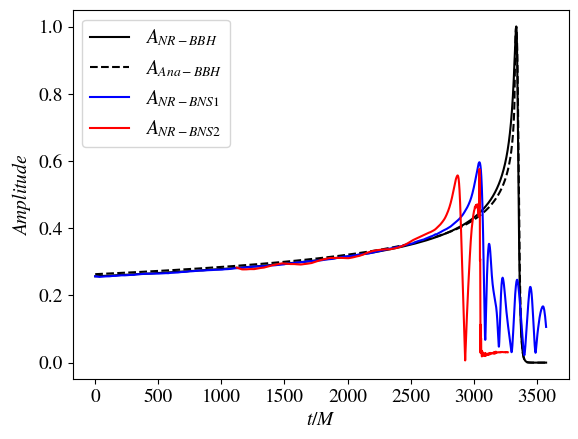

In [45]:
# plot the Phase Difference BNS matched at start 
fact1 = BBH1Ampintarr[0]/BNS1Ampintarr[0]
fact2 = BBH2Ampintarr[0]/BNS2Ampintarr[0]

#plot the normalized amplitudes
plt.plot(BNS1Tshift, BBH1Ampintarr, 'k')
plt.plot(BNS1Tshift, AnaBBH1Aintarr, '--k')
plt.plot(BNS1Tshift, BNS1Ampintarr*fact1, 'b')
plt.plot(BNS2Tshift+ΔTrefBNS12, BNS2Ampintarr*fact2, 'r')
plt.xlabel("$t/M$")
plt.ylabel("$Amplitude$") 
plt.legend(("$A_{NR-BBH}$","$A_{Ana-BBH}$", "$A_{NR-BNS1}$", "$A_{NR-BNS2}$"),loc="upper left")

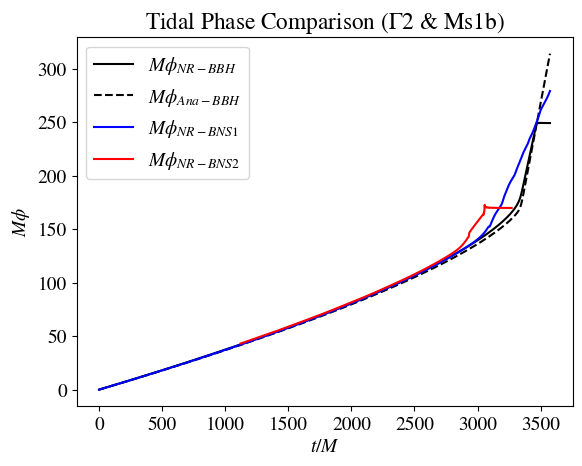

In [46]:
# plot the Phase Difference BNS matched at start 
plt.title("Tidal Phase Comparison ($\Gamma$2 & Ms1b)")
plt.plot(BNS1Tshift, BBH1ϕintarr-BBH1ϕintarr[0], 'k')
plt.plot(BNS1Tshift, AnaBBH1ϕintarr-AnaBBH1ϕintarr[0], '--k')
plt.plot(BNS1Tshift, BNS1ϕintarr-BNS1ϕintarr[0], 'b')
plt.plot(BNS2Tshift+ΔTrefBNS12, BNS2ϕintarr-BNS2ϕintarr[0]+ΔϕrefBNS12, 'r')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi$") 
plt.legend(("$M\phi_{NR-BBH}$","$M\phi_{Ana-BBH}$", "$M\phi_{NR-BNS1}$", "$M\phi_{NR-BNS2}$"),loc="upper left")

## Analytic Tidal Effects to the Phase in the Time Domain 

Implementation from:
https://arxiv.org/pdf/1804.02235.pdf eq. (5) and 
https://arxiv.org/pdf/1905.06011.pdf eq. 
We use BNS data from https://arxiv.org/abs/1812.06988
Masses are $m_1 = 2.8$ and $m_2 = 2.7$.
Both systems have equal masses. 
Here, for NSNS_0001, the EOS is $\Gamma 2$ with $\tilde \Lambda = 791$, 
and for  NSNS_0002, the EOS is MS1b with $\tilde \Lambda = 1540$.

In [47]:
from MAINLOGIC_V2 import TidalPhase as TP
a=globals()
TP.initialize(a)
globals().update(TP.retrievequantities())

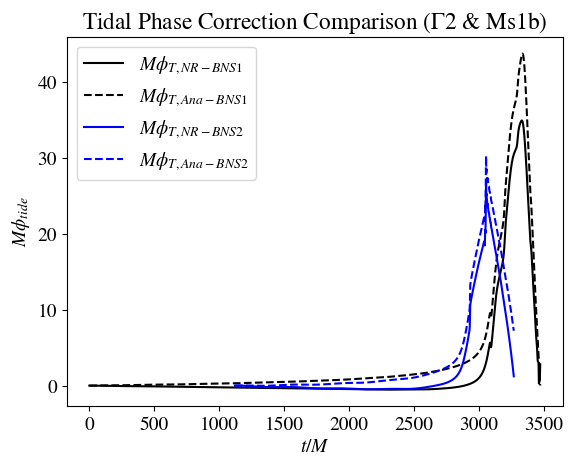

In [48]:
# plot the Phase Difference BNS matched at start 
plt.title("Tidal Phase Correction Comparison ($\Gamma$2 & Ms1b)")
plt.plot(BNS1Tshift[0:-1000], BNS1ϕTideNR[0:-1000], 'k')
plt.plot(BNS1Tshift[0:-1000], BNS1ϕTideAna[0:-1000], '--k')
plt.plot(BNS2Tshift+ΔTrefBNS12, BNS2ϕTideNR, 'b')
plt.plot(BNS2Tshift+ΔTrefBNS12, BNS2ϕTideAna, '--b')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{tide}$") 
plt.legend(("$M\phi_{T,NR-BNS1}$", "$M\phi_{T,Ana-BNS1}$", "$M\phi_{T,NR-BNS2}$", "$M\phi_{T,Ana-BNS2}$"),loc="upper left")

In [49]:
TP.firstfits()
globals().update(TP.retrievequantities())

In [50]:
print("length of tide arrays for BNS1",len(BNS1Tshift), len(BNS1ϕTideF2mrgarr), len(BNS1ϕTideF2arr))
print("length of tide arrays for BNS2",len(BNS2Tshift), len(BNS2ϕTideF2mrgarr), len(BNS2ϕTideF2arr))

length of tide arrays for BNS1 35740 33082 35740
length of tide arrays for BNS2 21485 21448 21485


2658


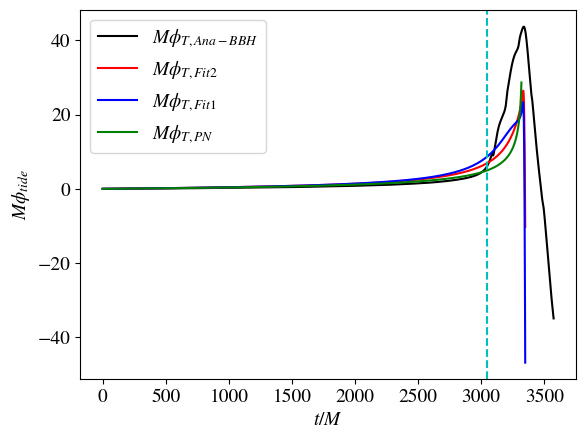

In [51]:
#plot rescaled analytic tides 

# plot the Phase Difference BNS matched at start 
#plt.title("Analytic BNS1 Tidal Phase Correction Comparison")
plt.plot(BNS1Tshift, BNS1ϕTideAna, 'k')
plt.plot(BNS1Tshift[0:-2250], BNS1ϕTideF2arr[0:-2250], 'r')
plt.plot(BNS1Tshift[0:-2250], BNS1ϕTideF1arr[0:-2250], 'b')
plt.plot(BNS1Tshift[0:-2550], BNS1ϕTidePNarr[0:-2550], 'g')
plt.axvline(x=BNS1Tshift[mrgBNS1index], color='c', ls='--')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{tide}$") 
plt.legend(("$M\phi_{T,Ana-BBH}$","$M\phi_{T,Fit2}$", "$M\phi_{T,Fit1}$", "$M\phi_{T,PN}$"),loc="upper left")
print(numBNS1off)
#print(mrgBNS1index,BNS1Tshift[mrgBNS1index],mrgBNS2index, BNS2Tshift[mrgBNS2index])

2658


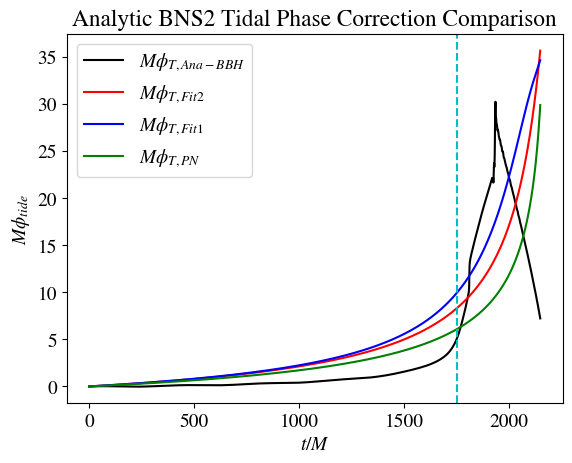

In [52]:
plt.title("Analytic BNS2 Tidal Phase Correction Comparison")
plt.plot(BNS2Tshift, BNS2ϕTideAna, 'k')
plt.plot(BNS2Tshift, BNS2ϕTideF2arr, 'r')
plt.plot(BNS2Tshift, BNS2ϕTideF1arr, 'b')
plt.plot(BNS2Tshift, BNS2ϕTidePNarr, 'g')
plt.axvline(x=BNS2Tshift[mrgBNS2index], color='c', ls='--')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{tide}$") 
plt.legend(("$M\phi_{T,Ana-BBH}$","$M\phi_{T,Fit2}$", "$M\phi_{T,Fit1}$", "$M\phi_{T,PN}$"),loc="upper left")
print(numBNS1off)

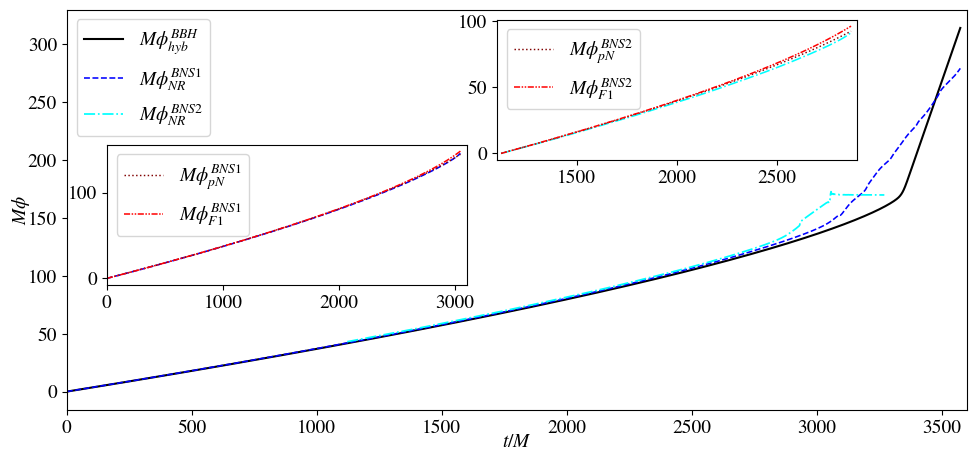

In [53]:
## Plots for paper 
#plt.plot(MtarrhybMshift,Mϕhybarrshift, 'k')
#plt.plot(MtarrhybMshift1+ΔTrefhyb1,Mϕhybarrshift1+Δϕrefhyb1, 'b')
#plt.plot(MtarrhybMshift2+ΔTrefhyb2,Mϕhybarrshift2+Δϕrefhyb2, 'r')
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.14, 0.35, 0.36, 0.28]) # inset axes
axes3 = fig.add_axes([0.53, 0.60, 0.36, 0.28]) # inset axes
#(x,y)

# main figure
#axes1.plot(BNS1Tshift, BBH1ϕintarr-BBH1ϕintarr[0], linestyle='solid', color='y',label=r"$M\phi_{NR}$")
axes1.plot(BNS1Tshift, AnaBBH1ϕintarr-AnaBBH1ϕintarr[0], linestyle='solid', color='black',label=r"$M\phi^{BBH}_{hyb}$")
axes1.plot(BNS1Tshift, BNS1ϕintarr-BNS1ϕintarr[0], linestyle='dashed', color='blue',linewidth=1.15,label=r"$M\phi^{BNS1}_{NR}$")
axes1.plot(BNS2Tshift+ΔTrefBNS12, BNS2ϕintarr-BNS2ϕintarr[0]+ΔϕrefBNS12, linestyle='dashdot', color='cyan',linewidth=1.25,label=r"$M\phi^{BNS2}_{NR}$")
axes1.set_xlim(0,3600)
axes1.set_xlabel('$t/M$',labelpad=-2)
axes1.set_ylabel('$M\phi$',labelpad=-3)
axes1.legend(loc=2)

# insert
axes2.plot(BNS1Tshift[:mrgBNS1index], BNS1ϕintarr[:mrgBNS1index]-BNS1ϕintarr[0], linestyle='dashed', color='blue',linewidth=1.15)
axes2.plot(BNS1Tshift[:mrgBNS1index], (AnaBBH1ϕintarr[:mrgBNS1index]-AnaBBH1ϕintarr[0])+BNS1ϕTidePNarr[:mrgBNS1index], linestyle='dotted', color='maroon',linewidth=1.05,label=r"$M\phi^{BNS1}_{pN}$")
axes2.plot(BNS1Tshift[:mrgBNS1index], (AnaBBH1ϕintarr[:mrgBNS1index]-AnaBBH1ϕintarr[0])+BNS1ϕTideF1arr[:mrgBNS1index], linestyle=dashdotdot, color='red',linewidth=1.10,label=r"$M\phi^{BNS1}_{F1}$")
#axes2.plot(BNS1Tshift[:mrgBNS1index], (AnaBBH1ϕintarr[:mrgBNS1index]-AnaBBH1ϕintarr[0])+BNS1ϕTideF2arr[:mrgBNS1index], linestyle=dashdotdot, color='yellow',linewidth=1.10)
#axes2.set_title('Analytic $M\phi$, $\Lambda = 791$');
axes2.set_xlim(0,3100)
axes2.legend(loc=2)

axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12, BNS2ϕintarr[:mrgBNS2index]-BNS2ϕintarr[0], linestyle='dashdot', color='cyan',linewidth=1.15)
axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12, (AnaBBH2ϕintarr[:mrgBNS2index]-AnaBBH2ϕintarr[0])+BNS2ϕTidePNarr[:mrgBNS2index], linestyle='dotted', color='maroon',linewidth=1.05, label=r"$M\phi^{BNS2}_{pN}$")
axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12, (AnaBBH2ϕintarr[:mrgBNS2index]-AnaBBH2ϕintarr[0])+BNS2ϕTideF1arr[:mrgBNS2index], linestyle=dashdotdot, color='red',linewidth=1.10, label=r"$M\phi^{BNS2}_{F1}$")
#axes3.plot(MtarrhybMshift2[:Mωhybimrg2]+ΔTrefhyb2,Mϕhybarrshift2[:Mωhybimrg2]+BNS2ϕTideF1arr[:Mωhybimrg2]+Δϕrefhyb2, linestyle=dashdotdot, color='red',linewidth=1.10)
#axes3.set_title('Analytic $M\phi$, $\Lambda = 1540$');
axes3.set_xlim(1100,2900)
axes3.legend(loc=2)

#fig.savefig("BNSphiTide.eps")
#fig.savefig("BNSphiTide.pdf")

#fig.savefig("Figure2.eps",bbox_inches='tight')

In [54]:
import timeit
start_time = timeit.default_timer()

TP.curvefits()
globals().update(TP.retrievequantities())

elapsed = timeit.default_timer() - start_time
print(elapsed)

6.374236985999232


In [55]:
#print out initial coefficients and fitted coefficients for both BNS
print("coefficients PN fit for NR BBH","\n")
print("initial coefficients PN paper:\n",coeffs_PN)
print("matched/fitted coeffs PN BNS1 mrg:\n",pBNS1matchedcoeffsmrg_PN)
print("matched/fitted coeffs PN BNS2 mrg:\n",pBNS2matchedcoeffsmrg_PN)
print("matched/fitted coeffs PN ratio mrg:\n",pBNS2matchedcoeffsmrg_PN/pBNS1matchedcoeffsmrg_PN)

coefficients PN fit for NR BBH 

initial coefficients PN paper:
 [4.99198718 0.         0.         0.         0.         0.
 0.         0.        ]
matched/fitted coeffs PN BNS1 mrg:
 [  -219.12106923   2144.36722719  -8655.1485383   16131.10817476
 -11365.25211087    -27.44106137     65.59564237    -28.67338479]
matched/fitted coeffs PN BNS2 mrg:
 [  -286.91175465   4420.40204749 -26115.07088557  66391.6914773
 -60870.21668914    266.85244259  -1698.21994863   2617.59964269]
matched/fitted coeffs PN ratio mrg:
 [  1.30937548   2.06140161   3.01728743   4.11575515   5.35581755
  -9.7245671  -25.88921897 -91.2902213 ]


In [56]:
#print out initial coefficients and fitted coefficients for both BNS
print("coefficients F1 fit for NR","\n")
print("initial coefficients PN paper:\n",coeffs_F1)
print("matched/fitted coeffs F1 BNS1 mrg:\n",pBNS1matchedcoeffsmrg_F1)
print("matched/fitted coeffs F1 BNS2 mrg:\n",pBNS2matchedcoeffsmrg_F1)
print("matched/fitted coeffs F1 ratio mrg:\n",pBNS2matchedcoeffsmrg_F1/pBNS1matchedcoeffsmrg_F1)

coefficients F1 fit for NR 

initial coefficients PN paper:
 [ -17.941        57.983      -298.876       964.192      -936.844
  -22.93275824   43.446         0.        ]
matched/fitted coeffs F1 BNS1 mrg:
 [  -219.09203508   2143.99734356  -8653.40923276  16127.56817291
 -11362.65503459    -27.44942335     65.64257681    -28.73982111]
matched/fitted coeffs F1 BNS2 mrg:
 [  -199.27565573   2744.36018927 -15525.48798637  38836.44708375
 -35400.12060667    137.71865853   -927.70340083   1465.99376613]
matched/fitted coeffs F1 ratio mrg:
 [  0.90955226   1.28002033   1.79414697   2.40807831   3.11547966
  -5.01717857 -14.13264753 -51.00914722]


In [57]:
#print out initial coefficients and fitted coefficients for both BNS
print("coefficients F2 fit for NR","\n")
print("initial coefficients PN paper:\n",coeffs_F2)
print("matched/fitted coeffs F2 BNS1 mrg:\n",pBNS1matchedcoeffsmrg_F2)
print("matched/fitted coeffs F2 BNS2 mrg:\n",pBNS2matchedcoeffsmrg_F2)
print("matched/fitted coeffs F2 ratio mrg:\n",pBNS2matchedcoeffsmrg_F2/pBNS1matchedcoeffsmrg_F2)

coefficients F2 fit for NR 

initial coefficients PN paper:
 [ -15.24521282   31.54226286  -80.92595768  312.48173    -342.15498
  -20.2372       39.39624449   -5.36163   ]
matched/fitted coeffs F2 BNS1 mrg:
 [  -219.16672802   2144.921969    -8657.64610641  16136.03189197
 -11368.82410877    -27.43838456     65.58016326    -28.65084128]
matched/fitted coeffs F2 BNS2 mrg:
 [  -211.29989836   2977.4338274  -17007.7471879   42708.05656786
 -38987.37736756    156.09466551  -1037.34835904   1629.86637085]
matched/fitted coeffs F2 ratio mrg:
 [  0.96410573   1.38813154   1.96447706   2.64675088   3.42932365
  -5.68891602 -15.81802038 -56.88720813]


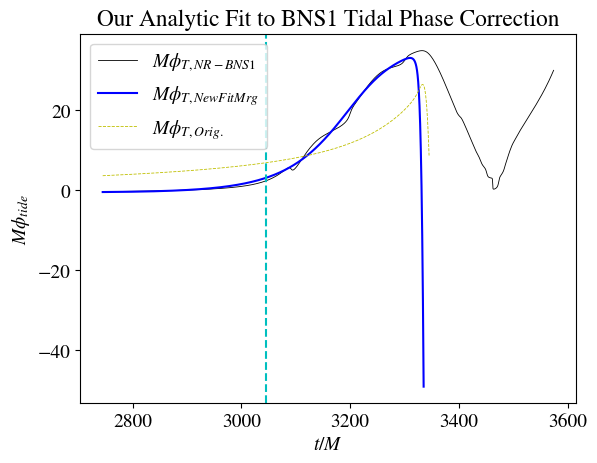

In [58]:
#plot rescaled analytic tides BNS 1
plt.title("Our Analytic Fit to BNS1 Tidal Phase Correction")
plt.plot(BNS1Tshift[mrgBNS1index-3000:-1], BNS1ϕTideNR[mrgBNS1index-3000:-1], 'k', linewidth=0.6)
plt.plot(BNS1Tshift[mrgBNS1index-3000:mrgBNS1index+2900], BNS1ϕTidemrg_F2[mrgBNS1index-3000:mrgBNS1index+2900], 'b')
plt.plot(BNS1Tshift[mrgBNS1index-3000:mrgBNS1index+3000], BNS1ϕTideF2arr[mrgBNS1index-3000:mrgBNS1index+3000], '--y', linewidth=0.6)
plt.axvline(x=BNS1Tshift[mrgBNS1index], color='c', ls='--')
#plt.axvline(x=BNS1Tshift[maxcorrectionIDX1], color='c', ls='--')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{tide}$") 
plt.legend(("$M\phi_{T,NR-BNS1}$","$M\phi_{T,NewFitMrg}$","$M\phi_{T,Orig.}$"),loc="upper left")

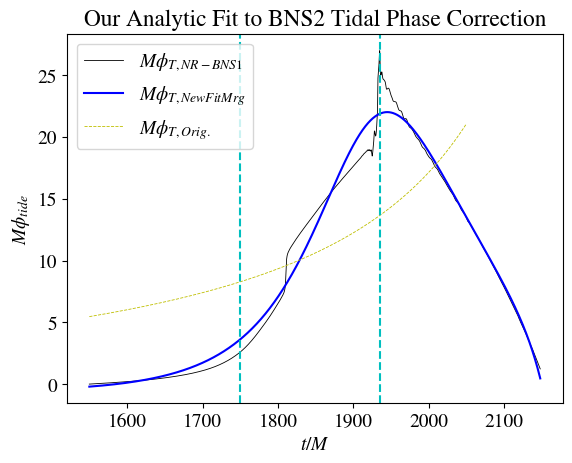

In [59]:
#plot rescaled analytic tides BNS 2
plt.title("Our Analytic Fit to BNS2 Tidal Phase Correction")
plt.plot(BNS2Tshift[mrgBNS2index-2000:-1], BNS2ϕTideNR[mrgBNS2index-2000:-1], 'k', linewidth=0.6)
plt.plot(BNS2Tshift[mrgBNS2index-2000:-1], BNS2ϕTidemrg_F2[mrgBNS2index-2000:-1], 'b')
plt.plot(BNS2Tshift[mrgBNS2index-2000:mrgBNS2index+3000], BNS2ϕTideF2arr[mrgBNS2index-2000:mrgBNS2index+3000], '--y', linewidth=0.6)
plt.axvline(x=BNS2Tshift[mrgBNS2index], color='c', ls='--')
plt.axvline(x=BNS2Tshift[maxcorrectionIDX2], color='c', ls='--')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{tide}$") 
plt.legend(("$M\phi_{T,NR-BNS1}$","$M\phi_{T,NewFitMrg}$","$M\phi_{T,Orig.}$"),loc="upper left")

(2000.0, 3325.0)

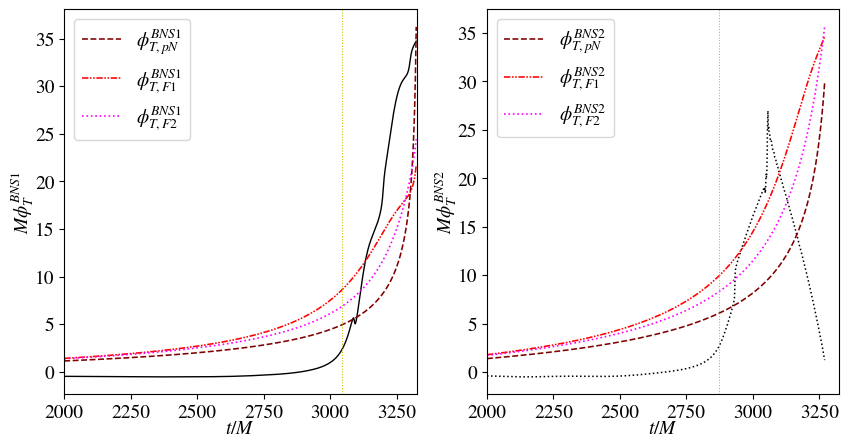

In [60]:
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(BNS1Tshift[20000:-2500], BNS1ϕTideNR[20000:-2500], linestyle='solid', color='black',linewidth=1.0)
axes[0].plot(BNS1Tshift[20000:-2500], BNS1ϕTidePNarr[20000:-2500], linestyle='dashed', color='maroon',linewidth=1.15,label=r"$\phi_{T, pN}^{BNS1}$")
axes[0].plot(BNS1Tshift[20000:-2500], BNS1ϕTideF1arr[20000:-2500], linestyle=dashdotdot, color='red',linewidth=1.15,label=r"$\phi_{T,F1}^{BNS1}$")
axes[0].plot(BNS1Tshift[20000:-2500], BNS1ϕTideF2arr[20000:-2500], linestyle='dotted', color='magenta',linewidth=1.20,label=r"$\phi_{T,F2}^{BNS1}$")
axes[0].axvline(x=BNS1Tshift[mrgBNS1index], color='y', linestyle='dotted', linewidth=0.75)
axes[0].set_xlabel('$t/M$',labelpad=-1)
axes[0].set_ylabel('$M\phi^{BNS1}_{T}$',labelpad=-1)
axes[0].legend(loc=2)
axes[0].set_xlim(2000,3325)

axes[1].plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTideNR[8780:-1], linestyle='dotted', color='black',linewidth=1.1)
axes[1].plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTidePNarr[8780:-1], linestyle='dashed', color='maroon',linewidth=1.15,label=r"$\phi_{T,pN}^{BNS2}$")
axes[1].plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTideF1arr[8780:-1], linestyle=dashdotdot, color='red',linewidth=1.15,label=r"$\phi_{T,F1}^{BNS2}$")
axes[1].plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTideF2arr[8780:-1], linestyle='dotted', color='magenta',linewidth=1.20,label=r"$\phi_{T,F2}^{BNS2}$")
axes[1].axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='y', linestyle='dotted', linewidth=0.75)
axes[1].set_xlabel('$t/M$',labelpad=-1)
axes[1].set_ylabel('$M\phi^{BNS2}_{T}$',labelpad=-1)
axes[1].legend(loc=2)
axes[1].set_xlim(2000,3325)

#fig.savefig("Figure7.eps",bbox_inches='tight')

In [61]:
BNS1n1   = np.average([pBNS1matchedcoeffsmrg_PN[0], pBNS1matchedcoeffsmrg_F1[0], pBNS1matchedcoeffsmrg_F2[0]])
BNS1n1p5 = np.average([pBNS1matchedcoeffsmrg_PN[1], pBNS1matchedcoeffsmrg_F1[1], pBNS1matchedcoeffsmrg_F2[1]])
BNS1n2   = np.average([pBNS1matchedcoeffsmrg_PN[2], pBNS1matchedcoeffsmrg_F1[2], pBNS1matchedcoeffsmrg_F2[2]])
BNS1n2p5 = np.average([pBNS1matchedcoeffsmrg_PN[3], pBNS1matchedcoeffsmrg_F1[3], pBNS1matchedcoeffsmrg_F2[3]])
BNS1n3   = np.average([pBNS1matchedcoeffsmrg_PN[4], pBNS1matchedcoeffsmrg_F1[4], pBNS1matchedcoeffsmrg_F2[4]])
BNS1d1   = np.average([pBNS1matchedcoeffsmrg_PN[5], pBNS1matchedcoeffsmrg_F1[5], pBNS1matchedcoeffsmrg_F2[5]])
BNS1d1p5 = np.average([pBNS1matchedcoeffsmrg_PN[6], pBNS1matchedcoeffsmrg_F1[6], pBNS1matchedcoeffsmrg_F2[6]])
BNS1d2   = np.average([pBNS1matchedcoeffsmrg_PN[7], pBNS1matchedcoeffsmrg_F1[7], pBNS1matchedcoeffsmrg_F2[7]])
BNS1averagecoeffs =np.array([BNS1n1,BNS1n1p5,BNS1n2,BNS1n2p5,BNS1n3,BNS1d1,BNS1d1p5,BNS1d2]) 
print("BNS1 averaged Coefficients",BNS1averagecoeffs)
BNS1ϕTideAvr = AnaϕTide1(Xhybarr[numBNS1ref:numBNS1fin],*BNS1averagecoeffs)
BNS1ϕTideAvr = BNS1ϕTideAvr - BNS1ϕTideAvr[0]

BNS1 averaged Coefficients [  -219.12661078   2144.42884658  -8655.40129249  16131.56941321
 -11365.57708474    -27.44295643     65.60612748    -28.68801572]


In [62]:
import statistics
BNS2n1   = np.average([pBNS2matchedcoeffsmrg_PN[0], pBNS2matchedcoeffsmrg_F1[0], pBNS2matchedcoeffsmrg_F2[0]])
BNS2n1p5 = np.average([pBNS2matchedcoeffsmrg_PN[1], pBNS2matchedcoeffsmrg_F1[1], pBNS2matchedcoeffsmrg_F2[1]])
BNS2n2   = np.average([pBNS2matchedcoeffsmrg_PN[2], pBNS2matchedcoeffsmrg_F1[2], pBNS2matchedcoeffsmrg_F2[2]])
BNS2n2p5 = np.average([pBNS2matchedcoeffsmrg_PN[3], pBNS2matchedcoeffsmrg_F1[3], pBNS2matchedcoeffsmrg_F2[3]])
BNS2n3   = np.average([pBNS2matchedcoeffsmrg_PN[4], pBNS2matchedcoeffsmrg_F1[4], pBNS2matchedcoeffsmrg_F2[4]])
BNS2d1   = np.average([pBNS2matchedcoeffsmrg_PN[5], pBNS2matchedcoeffsmrg_F1[5], pBNS2matchedcoeffsmrg_F2[5]])
BNS2d1p5 = np.average([pBNS2matchedcoeffsmrg_PN[6], pBNS2matchedcoeffsmrg_F1[6], pBNS2matchedcoeffsmrg_F2[6]])
BNS2d2   = np.average([pBNS2matchedcoeffsmrg_PN[7], pBNS2matchedcoeffsmrg_F1[7], pBNS2matchedcoeffsmrg_F2[7]])
BNS2averagecoeffs =np.array([BNS2n1,BNS2n1p5,BNS2n2,BNS2n2p5,BNS2n3,BNS2d1,BNS2d1p5,BNS2d2]) 
print("BNS2 averaged Coefficients",BNS2averagecoeffs)
BNS2ϕTideAvr = AnaϕTide2(Xhybarr[numBNS2ref:numBNS2fin],*pBNS1matchedcoeffsmrg_PN)
BNS2ϕTideAvr = BNS2ϕTidemrg_PN - BNS2ϕTidemrg_PN[0]
#print(np.std([pBNS2matchedcoeffsmrg_PN[0], pBNS2matchedcoeffsmrg_F1[0], pBNS2matchedcoeffsmrg_F2[0]]))

BNS2 averaged Coefficients [  -232.49576958   3380.73202139 -19549.43535328  49312.06504297
 -45085.90488779    186.88858888  -1221.0905695    1904.48659322]


3332.0999999969695 1935.09999999824


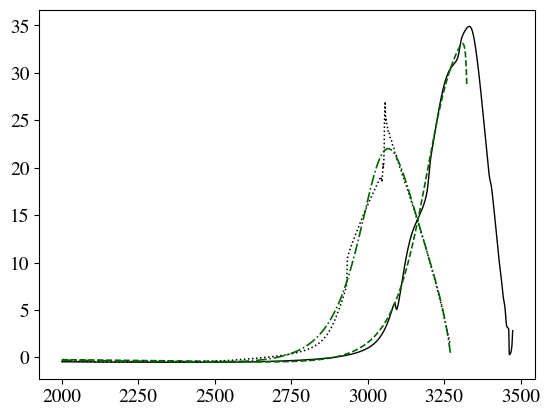

In [63]:
#BNS1tΛ, BNS2tΛ = 791, 1540
tΛratio = 1540/791
plt.plot(BNS1Tshift[20000:-1000], BNS1ϕTideNR[20000:-1000], linestyle='solid', color='black',linewidth=1.00,label=r"$\phi^{BNS1}_{T, NR}$")
plt.plot(BNS1Tshift[20000:-2500], BNS1ϕTideAvr[20000:-2500], linestyle='dashed', color='darkgreen',linewidth=1.2,label=r"$\phi^{BNS2}_{T,avr}$")
#plt.plot(BNS1Tshift[20000:-2500], BNS1ϕTidemrg_F2[20000:-2500], linestyle='dashed', color='blue',linewidth=1.2,label=r"$\phi^{BNS2}_{T,new}$")
plt.plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTideNR[8780:-1], linestyle='dotted', color='black',linewidth=1.1,label=r"$\phi^{BNS1}_{T, NR}$")
plt.plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTideAvr[8780:-1], linestyle='dashdot', color='darkgreen',linewidth=1.2,label=r"$\phi^{BNS2}_{T,new}$")
#plt.plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, BNS2ϕTidemrg_F2[8780:-1], linestyle='dashdot', color='blue',linewidth=1.2,label=r"$\phi^{BNS2}_{T,new}$")
axes1.set_xlabel('$t/M$',labelpad=-5)
axes1.set_ylabel('$M\phi_{T}$',labelpad=-1)
axes1.legend(loc=2)
print(BNS1Tshift[maxcorrectionIDX1],BNS2Tshift[maxcorrectionIDX2])

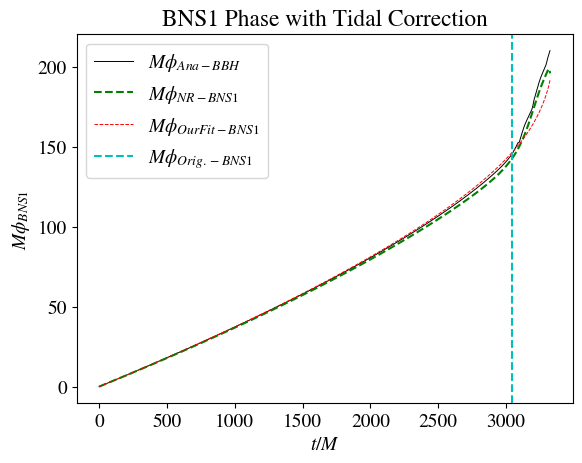

In [64]:
plt.title("BNS1 Phase with Tidal Correction")
#plt.plot(BNS1Tshift,Mϕhybarr[numBNS1ref:numBNS1fin]-Mϕhybarr[numBNS1ref],'b', linewidth=0.7)
plt.plot(BNS1Tshift[0:-2500],BNS1ϕintarr[0:-2500]-BNS1ϕintarr[0],'k', linewidth=0.7)
plt.plot(BNS1Tshift[0:-2500],BNS1ϕTidemrg_F2[0:-2500]+Mϕhybarr[numBNS1ref+0:numBNS1fin-2500]-(BNS1ϕTidemrg_F2[0]+Mϕhybarr[numBNS1ref]),'--g')
plt.plot(BNS1Tshift[0:-2500],BNS1ϕTideF2arr[0:-2500]+Mϕhybarr[numBNS1ref+0:numBNS1fin-2500]-(BNS1ϕTideF2arr[0]+Mϕhybarr[numBNS1ref]),'--r', linewidth=0.7)
plt.axvline(x=BNS1Tshift[mrgBNS1index], color='c', ls='--')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{BNS1}$") 
plt.legend(("$M\phi_{Ana-BBH}$","$M\phi_{NR-BNS1}$","$M\phi_{OurFit-BNS1}$", "$M\phi_{Orig.-BNS1}$"),loc="upper left")

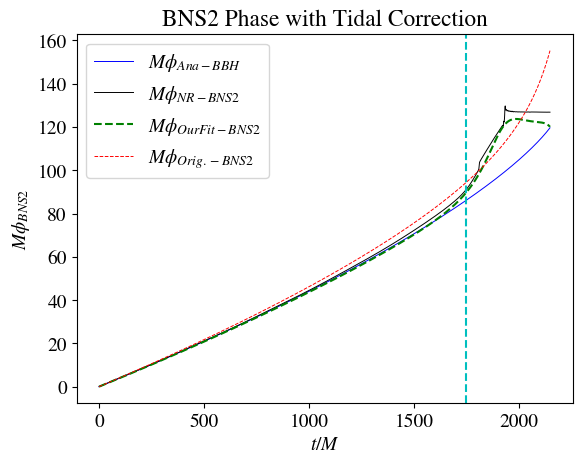

In [65]:
plt.title("BNS2 Phase with Tidal Correction")
plt.plot(BNS2Tshift,Mϕhybarr[numBNS2ref:numBNS2fin]-Mϕhybarr[numBNS2ref],'b', linewidth=0.7)
plt.plot(BNS2Tshift,BNS2ϕintarr-BNS2ϕintarr[0],'k', linewidth=0.7)
plt.plot(BNS2Tshift,BNS2ϕTidemrg_F2+Mϕhybarr[numBNS2ref:numBNS2fin]-(BNS2ϕTidemrg_F2[0]+Mϕhybarr[numBNS2ref]),'--g')
plt.plot(BNS2Tshift,BNS2ϕTideF2arr+Mϕhybarr[numBNS2ref:numBNS2fin]-(BNS2ϕTideF2arr[0]+Mϕhybarr[numBNS2ref]),'--r', linewidth=0.7)
plt.axvline(x=BNS2Tshift[mrgBNS2index], color='c', ls='--')
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{BNS2}$") 
plt.legend(("$M\phi_{Ana-BBH}$","$M\phi_{NR-BNS2}$","$M\phi_{OurFit-BNS2}$", "$M\phi_{Orig.-BNS2}$"),loc="upper left")

### Tapering

In [66]:
from MAINLOGIC_V2 import Tapering as T
a=globals()
T.initialize(a)

In [67]:
T.taper()
globals().update(T.retrievequantities())

In [78]:
# error between new analytic and numeric phase BNS1
print(MϕBNS1diff[cutoffs1[9]]/MϕBNS1NRarr[cutoffs1[9]]*1e2)
print(MϕBNS1diff[cutoffs1[10]]/MϕBNS1NRarr[cutoffs1[10]]*1e2)
# last cutoff point for BNS1 cutoffs1[9]

-2.8808681294470837
-1174.9809303204443


In [79]:
# error between new analytic and numeric phase BNS2
print(MϕBNS2diff[cutoffs2[21]]/MϕBNS2NRarr[cutoffs2[21]]*1e2)
print(MϕBNS2diff[cutoffs2[22]]/MϕBNS2NRarr[cutoffs2[22]]*1e2)
# last cutoff point for BNS2 cutoffs2[21]

-1.3185629981427063
-6.4423780772460635


447


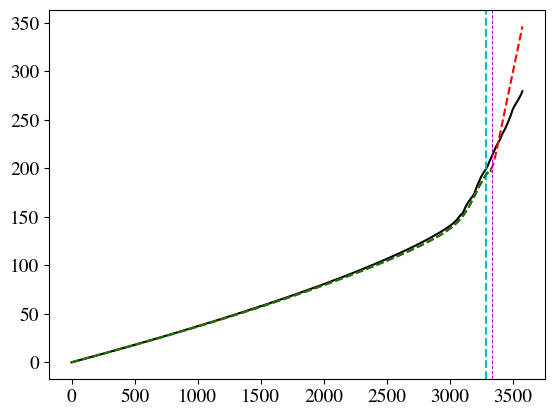

In [80]:
plt.plot(BNS1Tshift,MϕBNS1NRarr,'k')
#plt.plot(BNS1Tshift,Listofphasearrays1[4],'g')
#plt.plot(BNS1Tshift,MϕBNS1hybarr, '--r')
plt.plot(BNS1Tshift,MϕBNS1hybarr_hvs, '--r')
plt.axvline(x=BNS1Tshift[cutoffs1[9]], color='c', ls='--')
plt.axvline(x=BNS1Tshift[maxcorrectionIDX1], color='m', ls='--', linewidth=0.7)
plt.plot(BNS1Tshift[0:-2500],BNS1ϕTidemrg_F2[0:-2500]+Mϕhybarr[numBNS1ref+0:numBNS1fin-2500]-(BNS1ϕTidemrg_F2[0]+Mϕhybarr[numBNS1ref]),'--g')

print(maxcorrectionIDX1-cutoffs1[9])

200


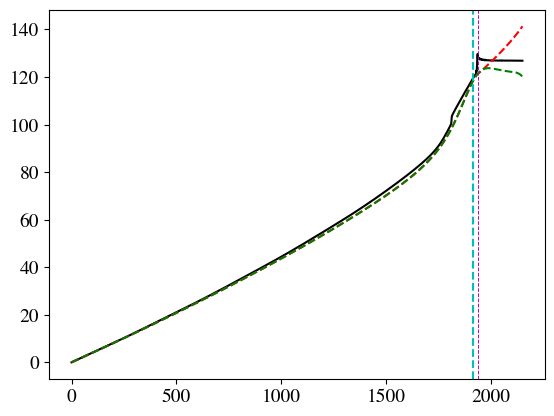

In [81]:
plt.plot(BNS2Tshift,MϕBNS2NRarr,'k')
#plt.plot(BNS2Tshift,Listofphasearrays2[11],'g')
plt.plot(BNS2Tshift,MϕBNS2hybarr_hvs, '--r')
plt.plot(BNS2Tshift,BNS2ϕTidemrg_F2+Mϕhybarr[numBNS2ref:numBNS2fin]-(BNS2ϕTidemrg_F2[0]+Mϕhybarr[numBNS2ref]),'--g')
plt.axvline(x=BNS2Tshift[cutoffs2[9]], color='c', ls='--')
plt.axvline(x=BNS2Tshift[maxcorrectionIDX2], color='m', ls='--', linewidth=0.7)
print(maxcorrectionIDX2-cutoffs2[9])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


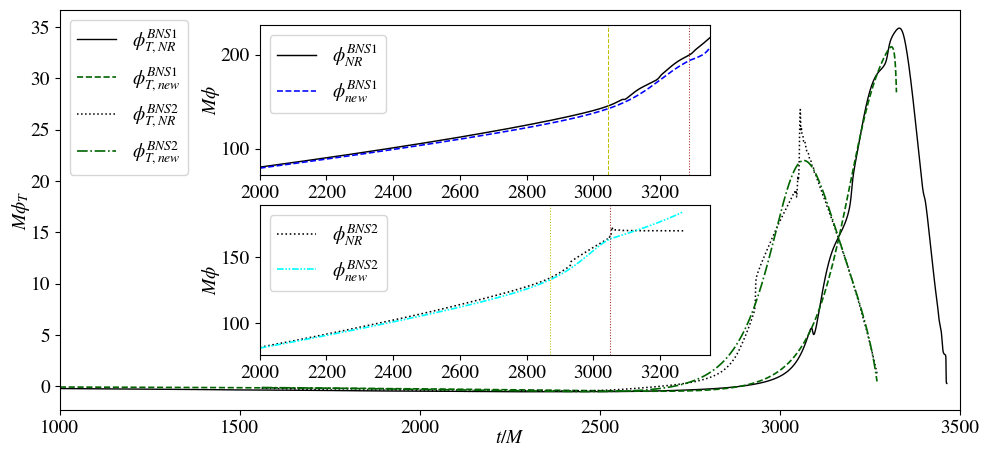

In [82]:
## Plots for paper 
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.30, 0.21, 0.45, 0.30]) # inset axes
axes3 = fig.add_axes([0.30, 0.57, 0.45, 0.30]) # inset axes
#(x,y)

# main figure
axes1.plot(BNS1Tshift[10000:-1100], BNS1ϕTideNR[10000:-1100], linestyle='solid', color='black',linewidth=1.00,label=r"$\phi^{BNS1}_{T, NR}$")
#axes1.plot(BNS1Tshift[10000:-1100], BNS1ϕTideNR[10000:-1100]/tΛratio, linestyle='solid', color='black',linewidth=1.00,label=r"$\phi^{BNS1}_{T, NR}$")
axes1.plot(BNS1Tshift[10000:-2500], BNS1ϕTidemrg_F2[10000:-2500], linestyle='dashed', color='darkgreen',linewidth=1.2,label=r"$\phi^{BNS1}_{T,new}$")
#axes1.plot(BNS2Tshift[0:-1]+ΔTrefBNS12, BNS2ϕTide_BNS1F2[0:-1]/tΛratio, linestyle='dashdot', color='red',linewidth=1.2,label=r"$\phi_{T,new}^{BNS1 \leftarrow BNS2}$")
axes1.plot(BNS2Tshift[4390:-1]+ΔTrefBNS12, BNS2ϕTideNR[4390:-1], linestyle='dotted', color='black',linewidth=1.1,label=r"$\phi^{BNS2}_{T, NR}$")
axes1.plot(BNS2Tshift[4390:-1]+ΔTrefBNS12, BNS2ϕTidemrg_F2[4390:-1], linestyle='dashdot', color='darkgreen',linewidth=1.2,label=r"$\phi^{BNS2}_{T,new}$")
#axes1.plot(BNS1Tshift[10000:-3000], BNS1ϕTide_BNS2F2[10000:-3000]*tΛratio, linestyle='dashed', color='red',linewidth=1.2,label=r"$\phi_{T,new}^{BNS1}$")
axes1.set_xlabel('$t/M$',labelpad=-5)
axes1.set_ylabel('$M\phi_{T}$',labelpad=-1)
axes1.legend(loc=2)
axes1.set_xlim(1000,3500)

# insert
axes2.plot(BNS2Tshift[8780:-1]+ΔTrefBNS12,MϕBNS2NRarr[8780:-1]-MϕBNS2NRarr[0]+ΔϕrefBNS12, linestyle='dotted', color='black',linewidth=1.15,label=r"$\phi^{BNS2}_{NR}$")
axes2.plot(BNS2Tshift[8780:-1]+ΔTrefBNS12, MϕBNS2hybarr_hvs[8780:-1]-MϕBNS2hybarr_hvs[0]+ΔϕrefBNS12, linestyle=dashdotdot, color='cyan',linewidth=1.20,label=r"$\phi^{BNS2}_{new}$")
axes2.axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='y', linestyle='dotted', linewidth=0.75)
axes2.axvline(x=BNS2Tshift[cutoffs2[21]]+ΔTrefBNS12, color='brown', linestyle='dotted', linewidth=0.75)
#axes2.set_title('Analytic $M\phi$, $\Lambda = 1540$');
axes2.set_ylabel('$M\phi$',labelpad=-1)
axes2.legend(loc=2)
axes2.set_xlim(2000,3350)

axes3.plot(BNS1Tshift[20000:-2000],MϕBNS1NRarr[20000:-2000]-MϕBNS1NRarr[0],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")
axes3.plot(BNS1Tshift[20000:-2000],MϕBNS1hybarr_hvs[20000:-2000]-MϕBNS1hybarr_hvs[0], linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
axes3.axvline(x=BNS1Tshift[mrgBNS1index], color='y', linestyle='dashed', linewidth=0.75)
axes3.axvline(x=BNS1Tshift[cutoffs1[9]], color='brown', linestyle='dotted', linewidth=0.75)
#axes3.set_xlabel('$t/M$',labelpad=-5)
axes3.set_ylabel('$M\phi$',labelpad=-1)
axes3.legend(loc=2)
axes3.set_xlim(2000,3350)

#fig.savefig("tapeBNSphiTide.eps")
#fig.savefig("tapeBNSphiTide.pdf")

#fig.savefig("Figure6.eps",bbox_inches='tight')

In [84]:
print("time beyond merger in M and sec:","\n")
print("BNS1", BNS1Tshift[cutoffs1[9]]-BNS1Tshift[mrgBNS1index], (BNS1Tshift[cutoffs1[9]]-BNS1Tshift[mrgBNS1index])*cT)
print("BNS2", BNS2Tshift[cutoffs2[21]]-BNS2Tshift[mrgBNS2index], (BNS2Tshift[cutoffs2[21]]-BNS2Tshift[mrgBNS2index])*cT)

time beyond merger in M and sec: 

BNS1 242.39999999977954 0.0011939390052880133
BNS2 180.1999999998361 0.0008875734684525577


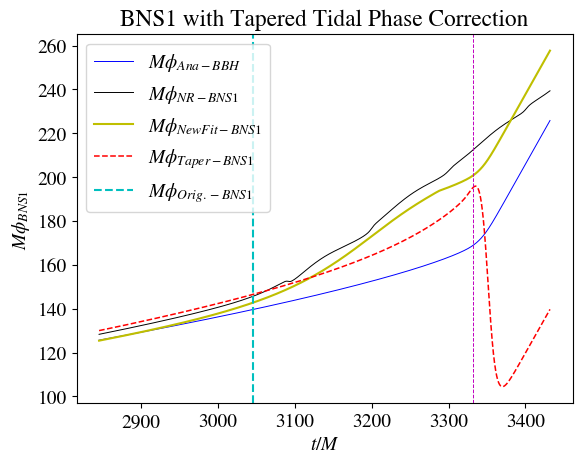

In [87]:
#plt.figure(figsize=(6,6))
#title_font = {'size':'26'}
plt.title("BNS1 with Tapered Tidal Phase Correction")
plt.plot(BNS1Tshift[mrgBNS1index-2000:maxcorrectionIDX1+1000],MϕBBH1hybarr[mrgBNS1index-2000:maxcorrectionIDX1+1000],'b', linewidth=0.7)
plt.plot(BNS1Tshift[mrgBNS1index-2000:maxcorrectionIDX1+1000],MϕBNS1NRarr[mrgBNS1index-2000:maxcorrectionIDX1+1000],'k', linewidth=0.7)
plt.plot(BNS1Tshift[mrgBNS1index-2000:maxcorrectionIDX1+1000],MϕBNS1hybarr_hvs[mrgBNS1index-2000:maxcorrectionIDX1+1000],'y') ##*this is the corrected phase
plt.plot(BNS1Tshift[mrgBNS1index-2000:maxcorrectionIDX1+1000],AnaBBH1ϕintarr[mrgBNS1index-2000:maxcorrectionIDX1+1000]-AnaBBH1ϕintarr[0]+BNS1ϕTideF2arr[mrgBNS1index-2000:maxcorrectionIDX1+1000], '--r',linewidth=1.10)
plt.axvline(x=BNS1Tshift[mrgBNS1index], color='c', ls='--')
plt.axvline(x=BNS1Tshift[maxcorrectionIDX1], color='m', ls='--', linewidth=0.7)
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{BNS1}$") 
plt.legend(("$M\phi_{Ana-BBH}$","$M\phi_{NR-BNS1}$","$M\phi_{NewFit-BNS1}$","$M\phi_{Taper-BNS1}$", "$M\phi_{Orig.-BNS1}$"),loc="upper left")

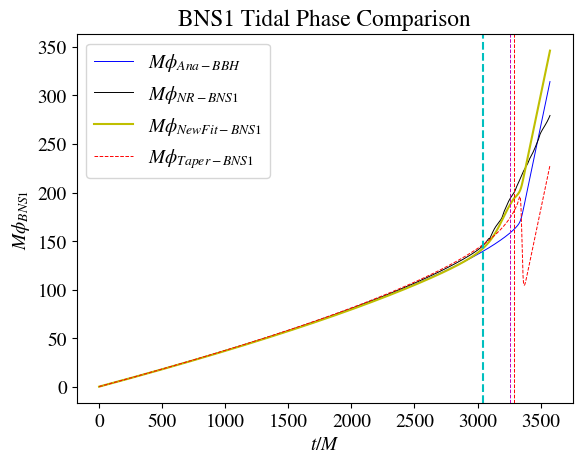

In [88]:
plt.title("BNS1 Tidal Phase Comparison")
plt.plot(BNS1Tshift,MϕBBH1hybarr,'b', linewidth=0.7)
plt.plot(BNS1Tshift,MϕBNS1NRarr,'k', linewidth=0.7)
#plt.plot(BNS1Tshift,MϕBNS1hybarr,'--g')
plt.plot(BNS1Tshift,MϕBNS1hybarr_hvs,'y')
plt.plot(BNS1Tshift,BNS1ϕTideF2arr+Mϕhybarr[numBNS1ref:numBNS1fin]-(BNS1ϕTideF2arr[0]+Mϕhybarr[numBNS1ref]),'--r', linewidth=0.7)
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{BNS1}$") 
plt.legend(("$M\phi_{Ana-BBH}$","$M\phi_{NR-BNS1}$","$M\phi_{NewFit-BNS1}$","$M\phi_{Taper-BNS1}$", "$M\phi_{Orig.-BNS1}$"),loc="upper left")
plt.axvline(x=BNS1Tshift[mrgBNS1index], color='c', ls='--')
plt.axvline(x=BNS1Tshift[cutoffs1[8]], color='m', ls='--', linewidth=0.7)
plt.axvline(x=BNS1Tshift[cutoffs1[9]], color='r', ls='--', linewidth=0.7)

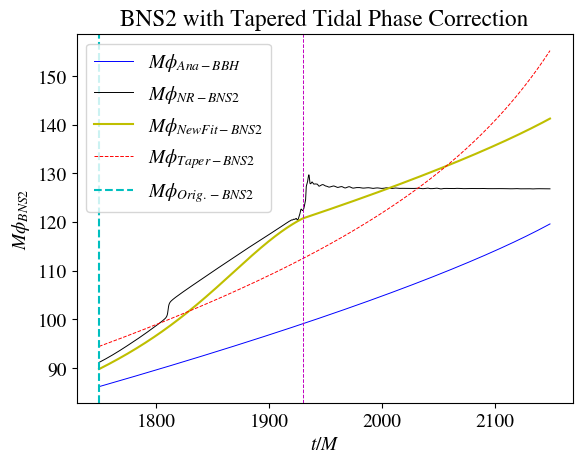

In [89]:
#plt.figure(figsize=(6,6))
#title_font = {'size':'26'}
plt.title("BNS2 with Tapered Tidal Phase Correction")
plt.plot(BNS2Tshift[mrgBNS2index:],MϕBBH2hybarr[mrgBNS2index:],'b', linewidth=0.7)
plt.plot(BNS2Tshift[mrgBNS2index:],MϕBNS2NRarr[mrgBNS2index:],'k', linewidth=0.7)
#plt.plot(BNS2Tshift[mrgBNS2index:],MϕBNS2hybarr[mrgBNS2index:],'--g')
#plt.plot(BNS1Tshift,MϕBNS1hybarr_hvs3,'y')
plt.plot(BNS2Tshift[mrgBNS2index:],MϕBNS2hybarr_hvs[mrgBNS2index:],'y')
plt.plot(BNS2Tshift[mrgBNS2index:],BNS2ϕTideF2arr[mrgBNS2index:]+Mϕhybarr[numBNS2ref+mrgBNS2index:numBNS2fin]-(BNS2ϕTideF2arr[0]+Mϕhybarr[numBNS2ref]),'--r', linewidth=0.7)
plt.axvline(x=BNS2Tshift[mrgBNS2index], color='c', ls='--')
plt.axvline(x=BNS2Tshift[cutoffs2[21]], color='m', ls='--', linewidth=0.7)
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{BNS2}$") 
plt.legend(("$M\phi_{Ana-BBH}$","$M\phi_{NR-BNS2}$","$M\phi_{NewFit-BNS2}$","$M\phi_{Taper-BNS2}$", "$M\phi_{Orig.-BNS2}$"),loc="upper left")

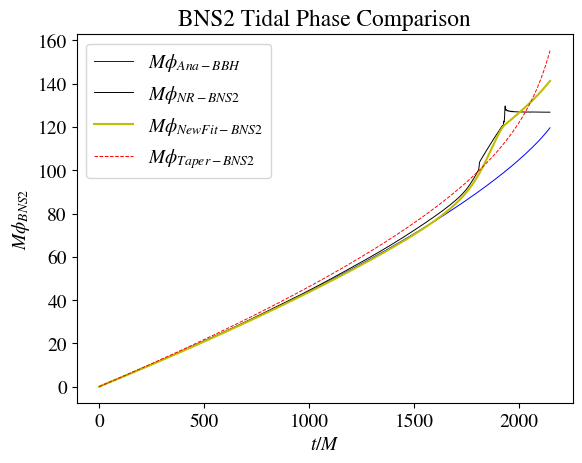

In [90]:
#plt.figure(figsize=(6,6))
#title_font = {'size':'26'}
plt.title("BNS2 Tidal Phase Comparison")
plt.plot(BNS2Tshift,MϕBBH2hybarr,'b', linewidth=0.7)
plt.plot(BNS2Tshift,MϕBNS2NRarr,'k', linewidth=0.7)
#plt.plot(BNS2Tshift,MϕBNS2hybarr,'--g')
plt.plot(BNS2Tshift,MϕBNS2hybarr_hvs,'y')
plt.plot(BNS2Tshift,BNS2ϕTideF2arr+Mϕhybarr[numBNS2ref:numBNS2fin]-(BNS2ϕTideF2arr[0]+Mϕhybarr[numBNS2ref]),'--r', linewidth=0.7)
#plt.axvline(x=BNS1Tshift, color='c', ls='--')
#plt.axvline(x=BNS1Tshift[cutoffs[5]], color='m', ls='--', linewidth=0.7)
plt.xlabel("$t/M$")
plt.ylabel("$M\phi_{BNS2}$") 
plt.legend(("$M\phi_{Ana-BBH}$","$M\phi_{NR-BNS2}$","$M\phi_{NewFit-BNS2}$","$M\phi_{Taper-BNS2}$", "$M\phi_{Orig.-BNS2}$"),loc="upper left")

####  Now we implement the amplitude correction.
##### We stop it at the cutoff time

In [91]:
from MAINLOGIC_V2 import TidalAmp as TA
a=globals()
TA.initialize(a)
globals().update(TA.retrievequantities())

In [92]:
TA.AnaApprox()
TA.curvefits()
globals().update(TA.retrievequantities())

In [93]:
# output for Amplitude
"""
BNS1PNATidearr BNS1PNATidefit
BNS1ATidearr BNS1ATidefit
BNS1AnaATidearr BNS1AnaATidefit
AmpBNS1pm AmpBNS1han
"""
print(Xc1, AnaXmrg1, Xmerge1)
print(Xc2, AnaXmrg2, Xmerge2)

0.1797630480473424 0.17399561300460498 0.11287940818513682
0.17334293918850874 0.1563543825551203 0.10372620852907082


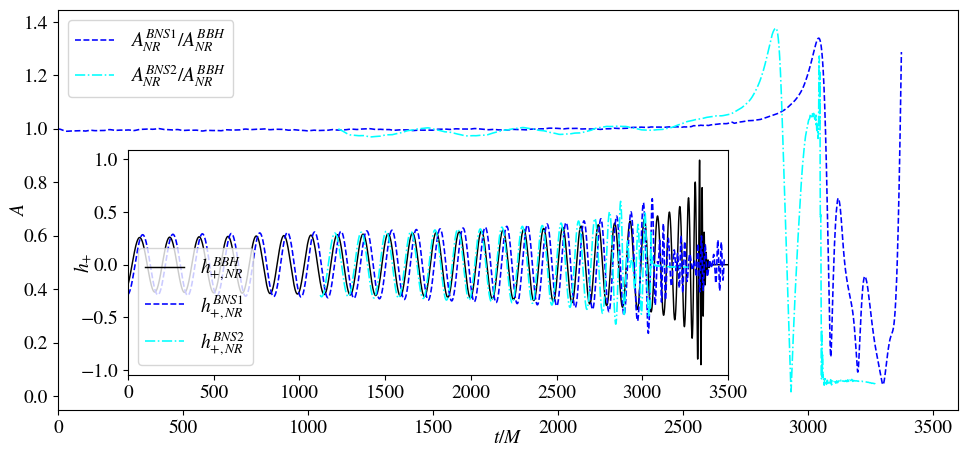

In [95]:
# merger locations mrgBNS1index, mrgBNS2index
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.17, 0.17, 0.60, 0.45]) # inset axes
#axes3 = fig.add_axes([0.30, 0.15, 0.35, 0.15]) # inset axes

# main figure
#axes1.plot(BNS1Tshift,BBH1Ampintarr/BBH1Ampintarr, linestyle='dotted', color='black',linewidth=1.05,label=r"$A^BBH_{NR}/A_{NR, BBH}$")
axes1.plot(BNS1Tshift[0:-2000],BNS1Ampintarr[0:-2000]*fact1/BBH1Ampintarr[0:-2000], linestyle='dashed', color='blue',linewidth=1.15,label=r"$A^{BNS1}_{NR}/A^{BBH}_{NR}$")
axes1.plot(BNS2Tshift+ΔTrefBNS12, BNS2Ampintarr*fact2/BBH2Ampintarr, linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$A^{BNS2}_{NR}/A^{BBH}_{NR}$")
axes1.set_xlabel('$t/M$',labelpad=-5)
axes1.set_ylabel('$A$',labelpad=-3)
axes1.legend(loc=2)
axes1.set_xlim(0,3600)
#axes1.set_title('title')

# insert
axes2.plot(BBHTime[BBH1ωiref:] - BBHTime[BBH1ωiref],BBHh22plus[BBH1ωiref:], color='black',linewidth=1.05, label=r"$h^{BBH}_{+,NR}$")
axes2.plot(BNS1Time[TrefBNS1:-700] - BNS1Time[TrefBNS1],m1*BNS1h22plus[TrefBNS1:-700], linestyle='dashed', color='blue',linewidth=1.15, label=r"$h^{BNS1}_{+,NR}$")
axes2.plot(BNS2Time[TrefBNS2:] - BNS2Time[TrefBNS2]+ΔTrefBNS12,m2*BNS2h22plus[TrefBNS2:], linestyle='dashdot', color='cyan',linewidth=1.15, label=r"$h^{BNS2}_{+,NR}$")
axes2.set_ylabel('$h_{+}$',labelpad=-10)
axes2.set_xlim(0,3500)
axes2.legend(loc=3)
#axes2.set_title('Strain Comparison BBH')

#fig.savefig("BNSAhcomp.eps")
#fig.savefig("BNSAhcomp.pdf")

#fig.savefig("Figure3.eps",bbox_inches='tight')

In [96]:
print("BNS1 simulation merger x, A, d : ","\n",Xmerge1, Amerge1, dA1)
print("BNS1 approximation merger x, A, d:","\n", AnaXmrg1, AnaAmrg1, dAnaA1)
print("BNS1 original coefficients:","\n",initialPNAcoeffs1, initialAcoeffs1,initialAnaAcoeffs1)
print("BNS1 matched coefficients:","\n",matchedPNAcoeffs1, matchedAcoeffs1, matchedAnaAcoeffs1)

BNS1 simulation merger x, A, d :  
 0.11287940818513682 0.5963729666822567 -8.830164089003494
BNS1 approximation merger x, A, d: 
 0.17399561300460498 0.23536451820502666 -5.111838759319902
BNS1 original coefficients: 
 [0 1] [-8.83016409  1.        ] [-5.11183876  1.        ]
BNS1 matched coefficients: 
 [-1.39107224  0.15343401] [-1.39107758  0.15343575] [-1.391069    0.15343295]


In [97]:
print("BNS2 simulation merger x, A, d : ","\n",Xmerge2, Amerge2, dA2)
print("BNS2 approximation merger x, A, d:","\n", AnaXmrg2, AnaAmrg2, dAnaA2)
print("BNS2 original coefficients:","\n",initialPNAcoeffs2, initialAcoeffs2,initialAnaAcoeffs2)
print("BNS2 matched coefficients:","\n",matchedPNAcoeffs2, matchedAcoeffs2, matchedAnaAcoeffs2)
print("BNS2/BNS1 matched coefficients:","\n",matchedAcoeffs2/matchedAcoeffs1)

BNS2 simulation merger x, A, d :  
 0.10372620852907082 0.5569728139247672 -9.60135807919834
BNS2 approximation merger x, A, d: 
 0.1563543825551203 0.21223035173392393 -5.5915871544388995
BNS2 original coefficients: 
 [0 1] [-9.60135808  1.        ] [-5.59158715  1.        ]
BNS2 matched coefficients: 
 [-1.89380104  0.28389025] [-1.89380347  0.28389081] [-1.89380151  0.28389036]
BNS2/BNS1 matched coefficients: 
 [1.36139313 1.850226  ]


(1100.0, 2900.0)

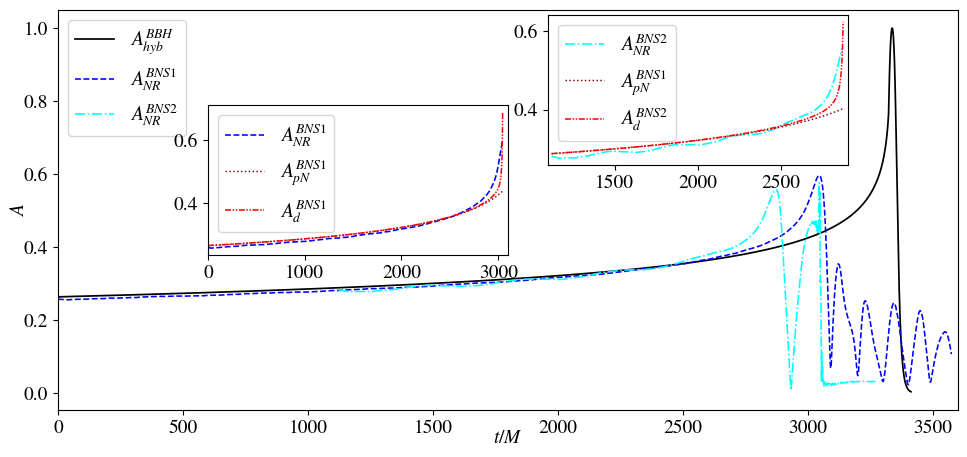

In [99]:
## Plots for paper 
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.25, 0.41, 0.30, 0.30]) # inset axes
axes3 = fig.add_axes([0.59, 0.59, 0.30, 0.30]) # inset axes

# main figure
#axes1.plot(BNS1Tshift[:Tcutoff1+1250],BBH1Ampintarr[:Tcutoff1+1250], linestyle='dotted', color='black',linewidth=1.25,label=r"$\log_{10}A_{hyb, Ana}$")
axes1.plot(BNS1Tshift[:Tcutoff1+1250],AnaBBH1Aintarr[:Tcutoff1+1250], linestyle='solid', color='black',linewidth=1.25,label=r"$A^{BBH}_{hyb}$")
axes1.plot(BNS1Tshift,fact1*BNS1Ampintarr, linestyle='dashed', color='blue',linewidth=1.15,label=r"$A^{BNS1}_{NR}$")
axes1.plot(BNS2Tshift+ΔTrefBNS12,fact2*BNS2Ampintarr, linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$A^{BNS2}_{NR}$")
axes1.set_xlabel('$t/M$',labelpad=-5)
axes1.set_ylabel('$A$',labelpad=-3)
axes1.legend(loc=2)
axes1.set_xlim(0,3600)

axes2.plot(BNS1Tshift[:mrgBNS1index],fact1*BNS1Ampintarr[:mrgBNS1index], linestyle='dashed', color='blue',linewidth=1.15,label=r"$A^{BNS1}_{NR}$")
axes2.plot(BNS1Tshift[:mrgBNS1index],AnaBBH1Aintarr[:mrgBNS1index]*(1.+BNS1PNATidearr[0:mrgBNS1index]),linestyle='dotted', color='maroon',linewidth=1.05,label=r"$A^{BNS1}_{pN}$")
axes2.plot(BNS1Tshift[:mrgBNS1index],AnaBBH1Aintarr[:mrgBNS1index]*(1.+BNS1ATidearr[0:mrgBNS1index]),linestyle=dashdotdot, color='red',linewidth=1.10,label=r"$A^{BNS1}_{d}$")
axes2.legend(loc=2)
axes2.set_xlim(0,3100)

axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12,fact2*BNS2Ampintarr[:mrgBNS2index], linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$A^{BNS2}_{NR}$")
axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12,AnaBBH2Aintarr[:mrgBNS2index]*(1.+BNS2PNATidearr[0:mrgBNS2index]),linestyle='dotted', color='maroon',linewidth=1.05,label=r"$A^{BNS1}_{pN}$")
axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12,AnaBBH2Aintarr[:mrgBNS2index]*(1.+BNS2ATidearr[0:mrgBNS2index]),linestyle=dashdotdot, color='red',linewidth=1.10,label=r"$A^{BNS2}_{d}$")
axes3.legend(loc=2)
axes3.set_xlim(1100,2900)

#fig.savefig("Figure4.eps",bbox_inches='tight')

#print(BNS1Tshift[Tcutoff1+1250], BNS1Tshift[mrgBNS1index], ΔTrefBNS12, BNS2Tshift[mrgBNS2index]+ΔTrefBNS12)

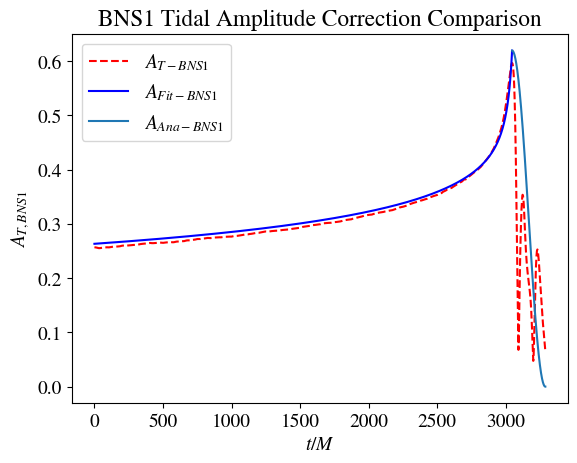

In [102]:
#plot
plt.title("BNS1 Tidal Amplitude Correction Comparison")
plt.plot(BNS1Tshift[0:Tcutoff1],fact1*BNS1Ampintarr[0:Tcutoff1],'--r')
#plt.plot(BNS1Tshift[0:Tcutoff1],AnaBBH1Aintarr[0:Tcutoff1],'--k')
#plt.plot(BNS1Tshift[0:mrgBNS1index],Aclip1[0:mrgBNS1index],'b')
plt.plot(BNS1Tshift[0:mrgBNS1index],AmpBNS1pm[0:mrgBNS1index],'b')
plt.plot(BNS1Tshift[mrgBNS1index:Tcutoff1],AmpBNS1han)
plt.xlabel("$t/M$")
plt.ylabel("$A_{T, BNS1}$") 
plt.legend(("$A_{T-BNS1}$","$A_{Fit-BNS1}$","$A_{Ana-BNS1}$","$A_{Clip}$","$A_{half-Hann}$" ),loc="upper left")

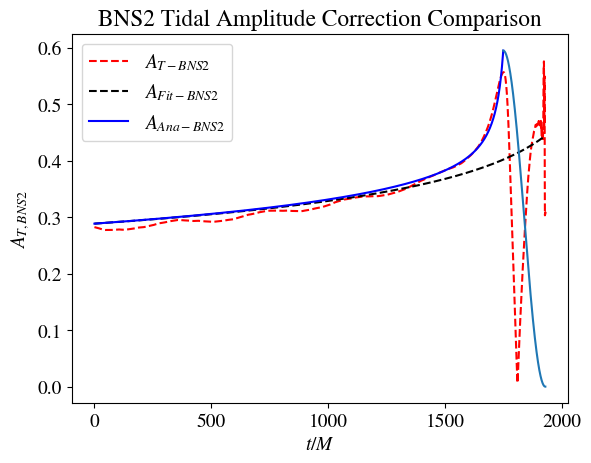

In [103]:
#plot
plt.title("BNS2 Tidal Amplitude Correction Comparison")
plt.plot(BNS2Tshift[0:Tcutoff2],fact2*BNS2Ampintarr[0:Tcutoff2],'--r')
plt.plot(BNS2Tshift[0:Tcutoff2],AnaBBH2Aintarr[0:Tcutoff2],'--k')
#plt.plot(BNS1Tshift[0:mrgBNS1index],AmpBNS1premrg[0:mrgBNS1index],'b')
plt.plot(BNS2Tshift[0:mrgBNS2index],AmpBNS2pm[0:mrgBNS2index],'b')
plt.plot(BNS2Tshift[mrgBNS2index:Tcutoff2],AmpBNS2han)
plt.xlabel("$t/M$")
plt.ylabel("$A_{T, BNS2}$") 
plt.legend(("$A_{T-BNS2}$","$A_{Fit-BNS2}$","$A_{Ana-BNS2}$"),loc="upper left")

(2000.0, 2920.0)

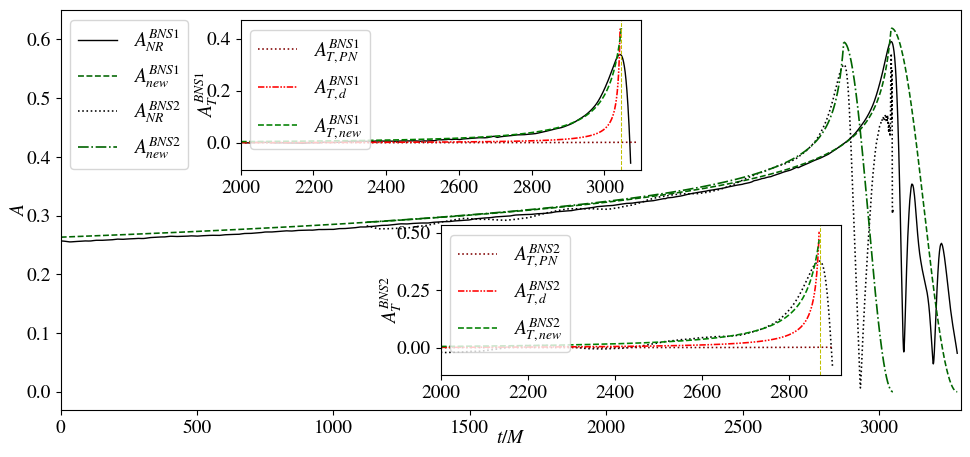

In [100]:
## Plots for paper 
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.28, 0.58, 0.40, 0.30]) # inset axes
axes3 = fig.add_axes([0.48, 0.17, 0.40, 0.30]) # inset axes

axes1.plot(BNS1Tshift[0:Tcutoff1],fact1*BNS1Ampintarr[0:Tcutoff1],linestyle='solid', color='black',linewidth=1,label=r"$A^{BNS1}_{NR}$")
axes1.plot(BNS1Tshift[0:mrgBNS1index],AmpBNS1pm[0:mrgBNS1index],linestyle='dashed', color='darkgreen',linewidth=1.15,label=r"$A^{BNS1}_{new}$")
axes1.plot(BNS1Tshift[mrgBNS1index:Tcutoff1],AmpBNS1han,linestyle='dashed', color='darkgreen',linewidth=1.15)
axes1.plot(BNS2Tshift[0:Tcutoff2]+ΔTrefBNS12,fact2*BNS2Ampintarr[0:Tcutoff2],linestyle='dotted', color='black',linewidth=1.15,label=r"$A^{BNS2}_{NR}$")
axes1.plot(BNS2Tshift[0:mrgBNS2index]+ΔTrefBNS12,AmpBNS2pm[0:mrgBNS2index],linestyle='dashdot', color='darkgreen',linewidth=1.2,label=r"$A^{BNS2}_{new}$")
axes1.plot(BNS2Tshift[mrgBNS2index:Tcutoff2]+ΔTrefBNS12,AmpBNS2han,linestyle='dashdot', color='darkgreen',linewidth=1.2)
axes1.set_xlabel('$t/M$',labelpad=-5)
axes1.set_ylabel('$A$',labelpad=-1)
#axes1.axvline(x=BNS1Tshift[cutoffs1[4]], color='brown', linestyle='dotted', linewidth=0.75)
axes1.legend(loc=2)
axes1.set_xlim(0,3300)

axes2.plot(BNS1Tshift[20000:Tcutoff1-2150],fact1*BNS1Ampintarr[20000:Tcutoff1-2150]/BBH1Ampintarr[20000:Tcutoff1-2150]-1, linestyle='solid', color='black',linewidth=1)
axes2.plot(BNS1Tshift[20000:Tcutoff1-2000],BNS1PNATidearr[20000:Tcutoff1-2000], linestyle='dotted', color='maroon',linewidth=1.15,label=r"$A^{BNS1}_{T,PN}$")
axes2.plot(BNS1Tshift[20000:Tcutoff1-2440],BNS1ATidearr[20000:Tcutoff1-2440], linestyle=dashdotdot, color='red',linewidth=1.15,label=r"$A^{BNS1}_{T,d}$")
axes2.plot(BNS1Tshift[20000:Tcutoff1-2400],BNS1ATidefit[20000:Tcutoff1-2400], linestyle='dashed', color='green',linewidth=1.15,label=r"$A^{BNS1}_{T,new}$")
axes2.legend(loc=2)
axes2.set_ylabel('$A_{T}^{BNS1}$',labelpad=-10)
axes2.axvline(x=BNS1Tshift[mrgBNS1index], color='y', linestyle='dashed', linewidth=0.75)
axes2.set_xlim(2000,3100)

axes3.plot(BNS2Tshift[8780:Tcutoff2-1500]+ΔTrefBNS12,fact2*BNS2Ampintarr[8780:Tcutoff2-1500]/BBH2Ampintarr[8780:Tcutoff2-1500]-1, linewidth=1.15,linestyle='dotted', color='black')
axes3.plot(BNS2Tshift[8780:Tcutoff2-1500]+ΔTrefBNS12,BNS2PNATidearr[8780:Tcutoff2-1500], linestyle='dotted', color='maroon',linewidth=1.15,label=r"$A^{BNS2}_{T,PN}$")
axes3.plot(BNS2Tshift[8780:Tcutoff2-1810]+ΔTrefBNS12,BNS2ATidearr[8780:Tcutoff2-1810], linestyle=dashdotdot, color='red',linewidth=1.15,label=r"$A^{BNS2}_{T,d}$")
axes3.plot(BNS2Tshift[8780:Tcutoff2-1810]+ΔTrefBNS12,BNS2ATidefit[8780:Tcutoff2-1810], linestyle='dashed', color='green',linewidth=1.15,label=r"$A^{BNS2}_{T,new}$")
axes3.legend(loc=2)
axes3.set_ylabel('$A_{T}^{BNS2}$',labelpad=-5)
axes3.axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='y', linestyle='dashed', linewidth=0.75)
axes3.set_xlim(2000,2920)

#axes3.axvline(x=BNS1Tshift[mrgBNS1index], color='y', linestyle='dashed', linewidth=0.75)
#axes3.axvline(x=BNS1Tshift[cutoffs1[4]], color='brown', linestyle='dotted', linewidth=0.75)

#fig.savefig("fitBNSAmpTide.eps")
#fig.savefig("fitBNSAmpTide.pdf")

#fig.savefig("Figure9.eps",bbox_inches='tight')

### Reconstructed Strain and Orbits beyond the Merger

In [104]:
#import MAINLOGIC_V2
from MAINLOGIC_V2 import Luminosity as L
a=globals()
L.initialize(a)
globals().update(L.retrievequantities())

In [105]:
print(mzA, mzB, mA, mz)

0.02828001224823869 2.828001224823869e-10 1.4 0.014140005982719285


In [ ]:
#plot
#plt.title("BNS1 Frequency with Tapered Tidal Phase Correction")
#plt.plot(BNS1Tshift[0:Tcutoff1-1],MωBBH1hybarr[0:Tcutoff1-1], 'k')
#plt.plot(BNS1Tshift[0:Tcutoff1-1],MωBNS1hybarr[0:Tcutoff1-1],'b')
#plt.plot(BNS1Tshift[0:Tcutoff1-1],MωBNS1NRarr[0:Tcutoff1-1], '--r', linewidth=0.7)
#plt.xlabel("$t/M$")
#plt.ylabel("$Mω$") 
#plt.legend(("$M\omega_{Ana-BBH}$","$M\phi_{NewFit-BNS1}$","$M\omega_{NR-BNS1}$",),loc="upper left")

In [ ]:
#plot
#plt.title("BNS2 Frequency with Tapered Tidal Phase Correction")
#plt.plot(BNS2Tshift[numBNS2ref:Tcutoff2-1],MωBBH2hybarr[numBNS2ref:Tcutoff2-1], 'k')
#plt.plot(BNS2Tshift[numBNS2ref:Tcutoff2-1],MωBNS2hybarr[numBNS2ref:Tcutoff2-1],'b')
#plt.plot(BNS2Tshift[numBNS2ref:Tcutoff2-1800],MωBNS2NRarr[numBNS2ref:Tcutoff2-1800], '--r', linewidth=0.7)
#plt.xlabel("$t/M$")
#plt.ylabel("$Mω$") 
#plt.legend(("$M\omega_{Ana-BBH}$","$M\phi_{NewFit-BNS2}$","$M\omega_{NR-BNS2}$",),loc="upper left")

In [ ]:
L.Lum()
globals().update(L.retrievequantities())

# Solar luminosity in geometric units - is unitless!
Lsun = Ls/cP
print(np.log10(LBBH1hyb[mrgBNS1index]/Lsun))
print(L0BNS1hyb[mrgBNS1index]/L0BBH1hyb[mrgBNS1index], L0BNS2hyb[mrgBNS2index]/L0BBH2hyb[mrgBNS2index])
print(LEMBNS1hyb[mrgBNS1index], LEMBNS2hyb[mrgBNS2index])

In [ ]:
## Plots for paper 

print(Lsun)
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.16, 0.23, 0.34, 0.40]) # inset axes
axes3 = fig.add_axes([0.55, 0.48, 0.34, 0.40]) # inset axes

# main figure
axes1.plot(BNS1Tshift[:mrgBNS1index],LBBH1hyb[:mrgBNS1index]/Lsun, linestyle='solid', color='black',linewidth=1.25,label=r"$L^{BBH}_{EM}/L_{\odot}, ~\Lambda = 0$")
axes1.plot(BNS1Tshift[:mrgBNS1index],LBNS1hyb[:mrgBNS1index]/Lsun, linestyle='dashed', color='blue',linewidth=1.15,label=r"$L^{BNS1}_{EM}/L_{\odot}, ~\Lambda = 791$")
axes1.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12,LBNS2hyb[:mrgBNS2index]/Lsun, linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$L^{BNS2}_{EM}/L_{\odot},~\Lambda = 1540$")
axes1.set_xlabel('$t/M$',labelpad=-1)
axes1.set_ylabel('$L_{EM}/L_{\odot}$',labelpad=-1)
axes1.legend(loc=2)
axes1.set_xlim(0,3100)

#axes2.plot(BNS1Tshift[:mrgBNS1index],L0BBH1hyb[:mrgBNS1index]/Lsun, linestyle='solid', color='black',linewidth=1.25,label=r"$L_{0,BBH}$")
axes2.plot(BNS1Tshift[:mrgBNS1index],L0BNS1hyb[:mrgBNS1index]/L0BBH1hyb[:mrgBNS1index], linestyle='dashed', color='blue',linewidth=1.15,label=r"$L^{BNS1}_{0}/L^{BBH}_{0}$")
axes2.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12,L0BNS2hyb[:mrgBNS2index]/L0BBH2hyb[:mrgBNS2index], linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$L^{BNS2}_{0}/L^{BBH}_{0}$")
#axes2.set_xlabel('$t/M$',labelpad=-5)
axes2.set_ylabel('$L^{BNS}_{0}/L^{BBH}_{0}$',labelpad=-2)
axes2.legend(loc=2)
axes2.set_xlim(0,3100)

axes3.plot(BNS1Tshift[:mrgBNS1index],LEMBBH1hyb[:mrgBNS1index], linestyle='solid', color='black',linewidth=1.25,label=r"$L^{BBH}_{rel}$")
axes3.plot(BNS1Tshift[:mrgBNS1index],LEMBNS1hyb[:mrgBNS1index], linestyle='dashed', color='blue',linewidth=1.15,label=r"$L^{BNS1}_{rel}$")
axes3.plot(BNS2Tshift[:mrgBNS2index]+ΔTrefBNS12,LEMBNS2hyb[:mrgBNS2index], linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$L^{BNS2}_{rel}$")
#axes3.set_xlabel('$t/M$',labelpad=-5)
axes3.set_ylabel('$L_{rel}$',labelpad=-5)
axes3.legend(loc=2)
axes3.set_xlim(0,3100)

#fig.savefig("BNSLmrg.eps")
#fig.savefig("BNSLmrg.pdf")

fig.savefig("Figure5.eps",bbox_inches='tight')
#axes1.set_xlim(0,3600)

#print(ΔTrefBNS12,BNS2Tshift[mrgBNS2index]+ΔTrefBNS12)

In [ ]:
## Plots for paper 
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.25, 0.25, 0.60, 0.60]) # inset axes
#axes3 = fig.add_axes([0.55, 0.45, 0.30, 0.40]) # inset axes

# main figure
#axes1.plot(rABBH1hybarr[0:mrgBBH1index],LBBH1hyb[0:mrgBBH1index]/L0BBH1hyb[:mrgBBH1index], linestyle='solid', color='black',linewidth=1.15,label=r"$L_{EM,BNS1}$")
axes1.plot(rABNS1hybarr[0:mrgBNS1index],LBNS1hyb[0:mrgBNS1index]/LBBH1hyb[0:mrgBNS1index], linestyle='dashed', color='blue',linewidth=1.15,label=r"$L_{EM,BNS1}/L_{EM,BBH}$")
axes1.plot(rABNS2hybarr[0:mrgBNS2index],LBNS2hyb[0:mrgBNS2index]/LBBH2hyb[0:mrgBNS2index], linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$L_{EM,BNS2}/L_{EM,BBH}$")
axes1.set_xlabel('$r/M$',labelpad=-1)
axes1.set_ylabel('$L_{EM, BNS}/L_{EM, BBH}$',labelpad=-1)
axes1.legend(loc=2)

#Parametric Plots of Orbits
plt.figure(figsize=(10,10)) # To ensure the aspect ratio such that the circle isn't elliptical
axes2.set_aspect('equal', adjustable='box')  # To keep the circle round
axes2.plot(xNS, yNS, linestyle='dotted', color='red',linewidth=0.7)
axes2.plot(rABBH1hybxarr[mrgBNS1index-10000:mrgBNS1index],rABBH1hybyarr[mrgBNS1index-10000:mrgBNS1index],linestyle='solid', color='black',linewidth=1, label=r"$BBH$ orbit")
axes2.plot(rABNS1hybxarr_hvs[mrgBNS1index-10000:mrgBNS1index],rABNS1hybyarr_hvs[mrgBNS1index-10000:mrgBNS1index],linestyle='dashed', color='blue',linewidth=1,label=r"$BNS1$ orbit")
axes2.plot(rABNS2hybxarr_hvs[mrgBNS2index-10000:mrgBNS2index],rABNS2hybyarr_hvs[mrgBNS2index-10000:mrgBNS2index],linestyle='dashdot', color='cyan',linewidth=1, label=r"$BNS2$ orbit")
axes2.set_xlabel("$x/M$", labelpad=-1)
axes2.set_ylabel("$y/M$", labelpad=-10)
axes2.legend(loc=10)

#fig.savefig("BNSLorbit.eps")
#fig.savefig("BNSLorbit.pdf")

#print(LBNS1hyb[mrgBNS1index]/LBBH1hyb[mrgBNS1index])
#print(LBNS2hyb[mrgBNS2index]/LBBH2hyb[mrgBNS2index])

In [ ]:
#plt.plot(BNS1Tshift[0:Tcutoff1-1],LEMBBHhyb[0:Tcutoff1-1],'k')
#plt.plot(BNS1Tshift[0:Tcutoff1-1],LEMBNS1hyb[0:Tcutoff1-1]/LEMBBH1hyb[0:Tcutoff1-1],linestyle='dashed', color='blue')
#plt.plot(BNS2Tshift[0:Tcutoff2-1]+ΔTrefBNS12,LEMBNS2hyb[0:Tcutoff2-1]/LEMBBH2hyb[0:Tcutoff2-1],linestyle='dashdot', color='cyan')
#plt.plot(BNS1Tshift[0:Tcutoff1-1],L0BBHhyb[0:Tcutoff1-1],'--k')
#plt.plot(BNS1Tshift[0:Tcutoff1-1],LEMBNS1NR[0:Tcutoff1-1],'--r')
#plt.xlabel("$t/M$")
#plt.ylabel("$L_{EM}$")

In [ ]:
#plt.plot(BNS2Tshift[0:Tcutoff2],LEMBNS2hyb[0:Tcutoff2]/LEMBNS2hyb[0],'b')
#plt.plot(BNS2Tshift[0:Tcutoff2],LEMBBH2hyb[0:Tcutoff2]/LEMBBH2hyb[0],'--k')
#plt.xlabel("$t/M$")
#plt.ylabel("$L_{EM}$")

In [ ]:
#Radiation/Poynting Flux at infinity as function of time
#plot (zoomed in on match time ti...AKA when inspiral phase transitions to merger and so...why you see amplification; 
#we dont know theory-wise why at the moment but we do observe this experimentally)
#plt.figure(figsize=[6,5])
#plt.plot(BNS1Tshift[0:Tcutoff1],LBBH1hyb[0:Tcutoff1]/LBBH1hyb[0],'--k')
#plt.plot(BNS1Tshift[0:Tcutoff1],LBNS1hyb[0:Tcutoff1]/LBNS1hyb[0],'b')
#plt.plot(BNS1Tshift[0:Tcutoff],LBNS1NR[0:Tcutoff],'--r')
#plt.xlabel("t/M")
#plt.ylabel("Radiant Power")
#plt.title("Luminosity at $\infty$ as system transitions \nfrom Inspiral to Merger")
#plt.xlabel("$t/M$")
#plt.ylabel("$L_{EM}/L_{0,EM}$") 
#plt.legend(("$L_{EM} (BBH, Ana)$","$L_{EM}(BNS, Ana)$"),loc="center left")

In [ ]:
#plot (zoomed in on match time ti...AKA when inspiral phase transitions to merger and so...why you see amplification; 
#we dont know theory-wise why at the moment but we do observe this experimentally)
#plt.figure(figsize=[6,5])
#plt.plot(BNS2Tshift[0:Tcutoff2],LBBH2hyb[0:Tcutoff2]/LBBH2hyb[0],'--k')
#plt.plot(BNS2Tshift[0:Tcutoff2],LBNS2hyb[0:Tcutoff2]/LBNS2hyb[0],'b')
#plt.xlabel("$t/M$")
#plt.ylabel("$L_{EM}/L_{0,EM}$") 
#plt.legend(("$L_{EM} (BBH, Ana)$","$L_{EM}(BNS2, Ana)$"),loc="center left")

In [ ]:
#plt.plot(BNS1Tshift[mrgBNS1index-2700:Tcutoff1],LEMBBH1hyb[mrgBNS1index-2700:Tcutoff1]/LEMBBH1hyb[0],'--k')
#plt.plot(BNS1Tshift[mrgBNS1index-1000:Tcutoff1],LEMBNS1hyb[mrgBNS1index-1000:Tcutoff1]/LEMBNS1hyb[0],'r')
#plt.plot(BNS2Tshift[mrgBNS2index-1000:Tcutoff2]+ΔTrefBNS12,LEMBBH2hyb[mrgBNS2index-1000:Tcutoff2]/LEMBBH2hyb[0],'--b')
#plt.plot(BNS2Tshift[mrgBNS2index-1000:Tcutoff2]+ΔTrefBNS12,LEMBNS2hyb[mrgBNS2index-1000:Tcutoff2]/LEMBNS2hyb[0],'b')
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='c', ls='--', linewidth=0.5)
#plt.xlabel("t/M")
#plt.ylabel("$L_{EM}$")
#plt.legend(("$L_{EM} (BBH, Ana)$","$L_{EM}(BNS1, Ana)$","$L_{EM}(BNS2, Ana)$"),loc="upper left")
#plt.title("$L_{EM}$ Luminosity Amplification \nfrom late Inspiral through Merger")

In [ ]:
#plt.plot(BNS1Tshift[mrgBNS1index-2700:Tcutoff1],L0BBH1hyb[mrgBNS1index-2700:Tcutoff1]/L0BBH1hyb[0],'--k')
#plt.plot(BNS1Tshift[mrgBNS1index-1000:Tcutoff1],L0BNS1hyb[mrgBNS1index-1000:Tcutoff1]/L0BNS1hyb[0],'r')
#plt.plot(BNS2Tshift[mrgBNS2index-1000:Tcutoff2]+ΔTrefBNS12,L0BBH2hyb[mrgBNS2index-1000:Tcutoff2]/L0BBH2hyb[0],'--b')
#plt.plot(BNS2Tshift[mrgBNS2index-1000:Tcutoff2]+ΔTrefBNS12,L0BNS2hyb[mrgBNS2index-1000:Tcutoff2]/L0BNS2hyb[0],'b')
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='c', ls='--', linewidth=0.5)
#plt.xlabel("t/M")
#plt.ylabel("$L0$")
#plt.legend(("$L_{0} (BBH, Ana)$","$L_{0}(BNS1, Ana)$","$L_{0}(BNS2, Ana)$"),loc="upper left")
#plt.title("$L_0$ Luminosity Amplification \nfrom late Inspiral through Merger")

In [ ]:
L.lm_terms()
globals().update(L.retrievequantities())
print()

In [ ]:
#plt.title("BNS1 Luminosity, (1,1) & (2,1) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH11[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS11[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH21[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS21[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR11[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR21[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'b', linewidth=0.5) #-LEMBNS21)
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{1,1} (BBH, Ana)$","$\eta_{1,1}(BNS, Ana)$", \
#            "$\eta_{2,1}(BBH, Ana)$","$\eta_{2,1}(BNS, Ana)$"),loc="center left")

In [ ]:
#plt.title("BNS1 Luminosity: (2,2) & (3,2) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH22[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--b') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS22[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'b') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH32[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS32[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR22[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'b', linewidth=0.5) #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR32[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS21
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{2,2} (BBH, Ana)$","$\eta_{2,2}(BNS, Ana)$",\
#            "$\eta_{3,2}(BNS, Ana)$","$\eta_{3,2}(BNS, Ana)$"),loc="upper left")

In [ ]:
#plt.title("BNS1 Luminosity: (3,3) & (4,3) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH43[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS43[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH33[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--b') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS33[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'b') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR43[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR33[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'b', linewidth=0.5) #-LEMBNS11)
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{4,3} (BBH, Ana)$","$\eta_{4,3}(BNS, Ana)$","$\eta_{4,3} (BNS, NR)$",\
#            "$\eta_{3,3}(BNS, Ana)$","$\eta_{3,3}(BNS, Ana)$","$\eta_{3,3}(BBH, NR)$"),loc="upper left")

In [ ]:
#plt.title("BNS1 Luminosity: (4,4), (5,4) & (5,5) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH44[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS44[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH54[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS54[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH55[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--g') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS55[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'g') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR44[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR54[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'b', linewidth=0.5) #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR55[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'g', linewidth=0.5) #-LEMBNS21)
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{4,4} (BBH, Ana)$","$\eta_{4,4}(BNS, Ana)$",\
#            "$\eta_{5,4}(BNS, Ana)$","$\eta_{5,4}(BNS, Ana)$", \
#           "$\eta_{5,5} (BBH, Ana)$","$\eta_{5,5}(BNS, Ana)$",),loc="upper left")

In [ ]:
#plt.title("BNS1 Luminosity: (3,1),(4,2) & (5,3) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH31[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS31[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH42[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS42[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH53[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--g') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS53[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'g') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR31[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR42[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'b', linewidth=0.5) #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR53[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'g', linewidth=0.5) #-LEMBNS21)
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{3,1} (BBH, Ana)$","$\eta_{3,1}(BNS, Ana)$",\
#            "$\eta_{4,2}(BBH, Ana)$","$\eta_{4,2}(BNS, Ana)$", \
#           "$\eta_{5,3}(BBH, Ana)$","$\eta_{5,3}(BNS, Ana)$"),loc="upper left")

In [ ]:
#plt.title("BNS1 Luminosity: (4,1) & (5,2) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH41[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS41[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH52[mrgBNS1index-2000:Tcutoff1-1]/LEMBBHlm[mrgBNS1index-2000:Tcutoff1-1],'--b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS52[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSlm[mrgBNS1index-2000:Tcutoff1-1],'b') #-LEMBNS21)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR41[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR52[mrgBNS1index-2000:Tcutoff1-1]/LEMBNSNRlm[mrgBNS1index-2000:Tcutoff1-1],'b', linewidth=0.5) #-LEMBNS21
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{4,1} (BBH, Ana)$","$\eta_{4,1}(BNS, Ana)$",\
#            "$\eta_{5,2}(BNS, Ana)$","$\eta_{5,2}(BNS, Ana)$"),loc="upper left")

In [ ]:
#plt.title("BNS1 Luminosity: (5,1) Modes")
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBBH51[mrgBNS1index-2000:Tcutoff1-1]/LEMBBH1hyb[mrgBNS1index-2000:Tcutoff1-1],'--k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMBNS51[mrgBNS1index-2000:Tcutoff1-1]/LEMBNS1hyb[mrgBNS1index-2000:Tcutoff1-1],'k') #-LEMBNS11)
#plt.plot(BNS1Tshift[mrgBNS1index-2000:Tcutoff1-1],2*LEMNR51[mrgBNS1index-2000:Tcutoff1-1]/LEMBNS1NR[mrgBNS1index-2000:Tcutoff1-1],'k', linewidth=0.5) #-LEMBNS11)
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='m', ls='--', linewidth=0.5)
#plt.xlabel("$t/M$")
#plt.ylabel("$L0\eta_{\ell,m}/L_{EM}$") 
#plt.legend(("$\eta_{5,1} (BBH, Ana)$","$\eta_{5,1}(BNS, Ana)$"),loc="upper left")

In [ ]:
## Plots for paper 
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.66, 0.49, 0.40, 0.40]) # inset axes
#axes3 = fig.add_axes([0.55, 0.45, 0.30, 0.40]) # inset axes

# main figure
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS11[20500:mrgBNS1index], linestyle='solid', color='k',linewidth=1.15,label=r"$\eta_{11}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS21[20500:mrgBNS1index], linestyle='dashed', color='b',linewidth=1.15,label=r"$\eta_{21}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS22[20500:mrgBNS1index], linestyle='solid', color='b',linewidth=1.15,label=r"$\eta_{22}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS32[20500:mrgBNS1index], linestyle='dashed', color='g',linewidth=1.15,label=r"$\eta_{32}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS33[20500:mrgBNS1index], linestyle='solid', color='g',linewidth=1.15,label=r"$\eta_{33}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS43[20500:mrgBNS1index], linestyle='dashed', color='m',linewidth=1.15,label=r"$\eta_{43}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS44[20500:mrgBNS1index], linestyle='solid', color='m',linewidth=1.15,label=r"$\eta_{44}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS54[20500:mrgBNS1index], linestyle='dashed', color='y',linewidth=1.15,label=r"$\eta_{54}$")
axes1.plot(rABNS1hybarr[20500:mrgBNS1index],LEM1BNS55[20500:mrgBNS1index], linestyle='solid', color='y',linewidth=1.15,label=r"$\eta_{55}$")
axes1.set_xlabel('$r_A/M$',labelpad=-5)
axes1.set_ylabel('$\eta_{\ell,m}$',labelpad=-1)
axes1.legend(loc=9)
axes1.set_xlim(2.8,5.6)

#Parametric Plots of Orbits
plt.figure(figsize=(10,10)) # To ensure the aspect ratio such that the circle isn't elliptical
axes2.set_aspect('equal', adjustable='box')  # To keep the circle round
axes2.plot(xNS, yNS, linestyle='dotted', color='red',linewidth=0.7)
#axes2.plot(rABBH1hybxarr[mrgBNS1index-10000:mrgBNS1index],rABBH1hybyarr[mrgBNS1index-10000:mrgBNS1index],linestyle='solid', color='black',linewidth=1, label=r"$BBH$ orbit")
axes2.plot(rABNS1hybxarr_hvs[20500:mrgBNS1index],rABNS1hybyarr_hvs[20500:mrgBNS1index],linestyle='dashed', color='brown',linewidth=0.75,label=r"$BNS1$ orbit")
#axes2.plot(rABNS2hybxarr_hvs[mrgBNS2index-10000:mrgBNS2index],rABNS2hybyarr_hvs[mrgBNS2index-10000:mrgBNS2index],linestyle='dashdot', color='cyan',linewidth=1, label=r"$BNS2$ orbit")
axes2.set_xlabel("$x_A/M$", labelpad=-1)
axes2.set_ylabel("$y_A/M$", labelpad=-10)
axes2.legend(loc=10)
axes2.set_xlim(-5.6,5.6)
axes2.set_ylim(-5.6,5.6)
axes2.set_yticks([-5,0, 5])

#fig.savefig("BNSLorbit.eps")
#fig.savefig("BNSLorbit.pdf")

print(rABNS1hybarr[20500],rABNS1hybarr[mrgBNS1index])
#fig.savefig("Figure6.eps",bbox_inches='tight')
#axes1.set_xlim(2.8,5.6)
print(VBNS1hybarr[20500], RBNS1hybarr[20500])
#print(LBNS2hyb[mrgBNS2index]/LBBH2hyb[mrgBNS2index])

In [ ]:
fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
# main figure
axes1.plot(BNS1Tshift[0:mrgBNS1index],LEM1BNS31[0:mrgBNS1index], linestyle='dashed', color='k',linewidth=1.15,label=r"$\eta_{31}$")
axes1.plot(BNS1Tshift[0:mrgBNS1index],LEM1BNS41[0:mrgBNS1index], linestyle='dotted', color='k',linewidth=1.15,label=r"$\eta_{41}$")
axes1.plot(BNS1Tshift[0:mrgBNS1index],LEM1BNS51[0:mrgBNS1index], linestyle=dashdotdot, color='k',linewidth=1.15,label=r"$\eta_{51}$")
axes1.plot(BNS1Tshift[0:mrgBNS1index],LEM1BNS42[0:mrgBNS1index], linestyle='dashed', color='b',linewidth=1.15,label=r"$\eta_{42}$")
axes1.plot(BNS1Tshift[0:mrgBNS1index],LEM1BNS52[0:mrgBNS1index], linestyle='dotted', color='b',linewidth=1.15,label=r"$\eta_{52}$")
axes1.plot(BNS1Tshift[0:mrgBNS1index],LEM1BNS53[0:mrgBNS1index], linestyle='dashed', color='m',linewidth=1.15,label=r"$\eta_{53}$")
#axes1.plot(rABNS2hybarr[0:mrgBNS2index],LEM2BNS11[0:mrgBNS2index], linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$L_{EM,BNS2}/L_{EM,BBH}$")
axes1.set_xlabel('$t/M$',labelpad=-1)
axes1.set_ylabel('$\eta_{lm}$  BNS1',labelpad=-1)
axes1.legend(loc=2)

In [ ]:
## Plots for paper 
dashdotdot = (0, (4, 1, 1, 1, 1, 1))
#Paper-quality plots
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10, 5))

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.8]) # main axes
axes2 = fig.add_axes([0.66, 0.49, 0.40, 0.40]) # inset axes
#axes3 = fig.add_axes([0.55, 0.45, 0.30, 0.40]) # inset axes

# main figure
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS11[mrgBNS1index:cutoffs1[6]], linestyle='solid', color='k',linewidth=1.15,label=r"$\eta_{11}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS21[mrgBNS1index:cutoffs1[6]], linestyle='dashed', color='b',linewidth=1.15,label=r"$\eta_{21}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS22[mrgBNS1index:cutoffs1[6]], linestyle='solid', color='b',linewidth=1.15,label=r"$\eta_{22}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS32[mrgBNS1index:cutoffs1[6]], linestyle='dashed', color='g',linewidth=1.15,label=r"$\eta_{32}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS33[mrgBNS1index:cutoffs1[6]], linestyle='solid', color='g',linewidth=1.15,label=r"$\eta_{33}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS43[mrgBNS1index:cutoffs1[6]], linestyle='dashed', color='m',linewidth=1.15,label=r"$\eta_{43}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS44[mrgBNS1index:cutoffs1[6]], linestyle='solid', color='m',linewidth=1.15,label=r"$\eta_{44}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS54[mrgBNS1index:cutoffs1[6]], linestyle='dashed', color='y',linewidth=1.15,label=r"$\eta_{54}$")
axes1.plot(rABNS1hybarr[mrgBNS1index:cutoffs1[6]],LEM1BNS55[mrgBNS1index:cutoffs1[6]], linestyle='solid', color='y',linewidth=1.15,label=r"$\eta_{55}$")
axes1.set_xlabel('$r_A/M$',labelpad=-5)
axes1.set_ylabel('$\eta_{\ell,m}$',labelpad=-1)
axes1.legend(loc=9)
#axes1.set_xlim(2.8,5.6)

#Parametric Plots of Orbits
plt.figure(figsize=(10,10)) # To ensure the aspect ratio such that the circle isn't elliptical
axes2.set_aspect('equal', adjustable='box')  # To keep the circle round
axes2.plot(xNS, yNS, linestyle='dotted', color='green',linewidth=0.7)
axes2.plot(xBH, yBH, linestyle='dotted', color='black',linewidth=1.7)
#axes2.plot(rABBH1hybxarr[mrgBNS1index-10000:mrgBNS1index],rABBH1hybyarr[mrgBNS1index-10000:mrgBNS1index],linestyle='solid', color='black',linewidth=1, label=r"$BBH$ orbit")
axes2.plot(rABNS1hybxarr_hvs[20500:cutoffs1[6]],rABNS1hybyarr_hvs[20500:cutoffs1[6]],linestyle='dashed', color='brown',linewidth=0.75,label=r"$BNS1$ orbit")
#axes2.plot(rABNS2hybxarr_hvs[mrgBNS2index-10000:mrgBNS2index],rABNS2hybyarr_hvs[mrgBNS2index-10000:mrgBNS2index],linestyle='dashdot', color='cyan',linewidth=1, label=r"$BNS2$ orbit")
axes2.set_xlabel("$x_A/M$", labelpad=-1)
axes2.set_ylabel("$y_A/M$", labelpad=-10)
axes2.legend(loc=10)
axes2.set_xlim(-5.6,5.6)
axes2.set_ylim(-5.6,5.6)
axes2.set_yticks([-5,0, 5])

#fig.savefig("BNSLorbit.eps")
#fig.savefig("BNSLorbit.pdf")

print(rABNS1hybarr[20500],rABNS1hybarr[mrgBNS1index])
#fig.savefig("Figure6.eps",bbox_inches='tight')
#axes1.set_xlim(2.8,5.6)
print(VBNS1hybarr[20500], RBNS1hybarr[20500])
#print(LBNS2hyb[mrgBNS2index]/LBBH2hyb[mrgBNS2index])

In [ ]:
print("BNS1 velocity ratio at merger",-vARBNS1hybarr[mrgBNS1index]/vABNS1hybarr[mrgBNS1index])
print("BNS2 velocity ratio at merger",-vARBNS2hybarr[mrgBNS2index]/vABNS2hybarr[mrgBNS2index])

In [ ]:
print("BNS1 velocity ratio at cutoff",-vARBNS1hybarr[Tcutoff1-1]/vABNS1hybarr[Tcutoff1-1])
print("BNS2 velocity ratio at cutoff",-vARBNS2hybarr[Tcutoff2-1]/vABNS2hybarr[Tcutoff2-1])

In [ ]:
plt.plot(BNS1Tshift[0:cutoffs1[8]-10],-vARBNS1hybarr[0:cutoffs1[8]-10],linestyle='dashed', color='blue')
plt.plot(BNS2Tshift[0:cutoffs2[5]-100]+ΔTrefBNS12, -vARBNS2hybarr[0:cutoffs2[5]-100],linestyle='dashdot', color='cyan')
plt.xlabel("$t/M$")
plt.ylabel("$V_{A,R}$")
plt.axvline(x=BNS1Tshift[mrgBNS1index], color='b', linestyle='dashed', linewidth=0.75)
plt.axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='c', linestyle='dashed', linewidth=0.75)

In [ ]:
###must stop at the speed of light!!!!!!!!!!!!!!
#plt.plot(BNS1Tshift[0:cutoffs1[9]-1],vABNS1hybarr[0:cutoffs1[9]-1],linestyle='solid', color='blue')
#plt.plot(BNS2Tshift[0:cutoffs2[21]-1]+ΔTrefBNS12, vABNS2hybarr[0:cutoffs2[21]-1],linestyle='solid', color='cyan')
plt.plot(BNS1Tshift[0:cutoffs1[6]-1],vABNS1hybarr[0:cutoffs1[6]-1],linestyle='solid', color='blue')
plt.plot(BNS2Tshift[0:cutoffs2[4]-1]+ΔTrefBNS12, vABNS2hybarr[0:cutoffs2[4]-1],linestyle='solid', color='cyan')
#plt.plot(BNS1Tshift[0:cutoffs1[8]+299],vARBNS1hybarr[0:cutoffs1[8]+299],linestyle='dashed', color='blue')
#plt.plot(BNS2Tshift[0:cutoffs2[20]+13]+ΔTrefBNS12, vARBNS2hybarr[0:cutoffs2[20]+13],linestyle='dashdot', color='cyan')
plt.xlabel("$t/M$")
plt.ylabel("$V_{A}, V_{r, A}$")
#plt.axvline(x=BNS1Tshift[mrgBNS1index], color='b', linestyle='dashed', linewidth=0.75)
#plt.axvline(x=BNS2Tshift[mrgBNS2index]+ΔTrefBNS12, color='c', linestyle='dashed', linewidth=0.75)

In [ ]:
print(vARBNS2hybarr[cutoffs2[20]-1]/vABNS2hybarr[cutoffs2[20]-1])
print(vARBNS1hybarr[cutoffs1[8]-1]/vABNS1hybarr[cutoffs1[8]-1])

In [ ]:
plt.plot(BNS1Tshift[0:cutoffs1[6]],np.abs(vARBNS1hybarr[0:cutoffs1[6]])/np.abs(vABNS1hybarr[0:cutoffs1[6]]),linestyle='dashed',color='blue')
plt.plot(BNS2Tshift[0:cutoffs2[4]]+ΔTrefBNS12, np.abs(vARBNS2hybarr[0:cutoffs2[4]])/np.abs(vABNS2hybarr[0:cutoffs2[4]]),linestyle='dashdot', color='cyan')
plt.xlabel("$t/M$")
plt.ylabel("$V_{A,R}/V_{A}$")

In [ ]:
print("BNS1 velocity ratio at vr<6% v",-vARBNS1hybarr[cutoffs1[8]+298]/vABNS1hybarr[cutoffs1[8]+298])
print("BNS2 velocity ratio at vr<6% v",-vARBNS2hybarr[cutoffs2[5]-100]/vABNS2hybarr[cutoffs2[5]-100])

In [ ]:
## form the new BNS strain

#print(ΔTrefBNS12-BNS1TNew[11217])
#print(AnaBBH1ϕintarr[11217]-AnaBBH1ϕintarr[0])
ΔϕBNS2BBH = AnaBBH1ϕintarr[11217]-AnaBBH1ϕintarr[0]

#first concatenate the amplitude:
AmpBNS1New = np.concatenate((AmpBNS1pm[0:mrgBNS1index], AmpBNS1han))
AmpBNS2New = np.concatenate((AmpBNS2pm[0:mrgBNS2index], AmpBNS2han))

#then build the phase:
MϕBNS1New = MϕBNS1hybarr_hvs[0:Tcutoff1]-MϕBNS1hybarr_hvs[0]#+MϕBNS1NRarr[0]
MϕBNS2New = MϕBNS2hybarr_hvs[0:Tcutoff2]-MϕBNS2hybarr_hvs[0]+ΔϕBNS2BBH   #+MϕBNS2NRarr[0]

# for BNS1 
hplusBNS1New = np.array(hplushyb(AmpBNS1New,MϕBNS1New)).flatten()
hcrosBNS1New = np.array(hcroshyb(AmpBNS1New,MϕBNS1New)).flatten()

hplusBNS1NR = np.array(hplushyb(fact1*BNS1Ampintarr[0:Tcutoff1],MϕBNS1NRarr[0:Tcutoff1])).flatten()
hcrosBNS1NR = np.array(hcroshyb(fact1*BNS1Ampintarr[0:Tcutoff1],MϕBNS1NRarr[0:Tcutoff1])).flatten()

# for BNS2 
hplusBNS2New = np.array(hplushyb(AmpBNS2New,MϕBNS2New)).flatten()
hcrosBNS2New = np.array(hcroshyb(AmpBNS2New,MϕBNS2New)).flatten()

hplusBNS2NR = np.array(hplushyb(fact2*BNS2Ampintarr[0:Tcutoff2],MϕBNS2NRarr[0:Tcutoff2])).flatten()
hcrosBNS2NR = np.array(hcroshyb(fact2*BNS2Ampintarr[0:Tcutoff2],MϕBNS2NRarr[0:Tcutoff2])).flatten()


# for BBH Ana BNS1Tshift
hplusAna = np.array(hplushyb(AnaBBH1Aintarr[0:Tcutoff1],(AnaBBH1ϕintarr[0:Tcutoff1]-AnaBBH1ϕintarr[0]))).flatten()
hcrosAna = np.array(hcroshyb(AnaBBH1Aintarr[0:Tcutoff1],(AnaBBH1ϕintarr[0:Tcutoff1]-AnaBBH1ϕintarr[0]))).flatten()
hplusAnaAll = np.array(hplushyb(AnaBBH1Aintarr,(AnaBBH1ϕintarr-AnaBBH1ϕintarr[0]))).flatten()
hcrosAnaAll = np.array(hcroshyb(AnaBBH1Aintarr,(AnaBBH1ϕintarr-AnaBBH1ϕintarr[0]))).flatten()

# the new time arrays
BNS1TNew = BNS1Tshift[0:Tcutoff1]
BNS2TNew = BNS2Tshift[0:Tcutoff2]

#plt.plot(BNS1Tshift[0:Tcutoff1],AmpBNS1New,linestyle='dashed', color='darkgreen',linewidth=1.15)
#plt.plot(BNS2Tshift[0:Tcutoff2]+ΔTrefBNS12,AmpBNS2New,linestyle='dashdot', color='darkgreen',linewidth=1.2)

#plt.plot(BNS1TNew,MϕBNS1New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
#plt.plot(BNS1TNew,MϕBNS1NRarr[0:Tcutoff1],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

plt.plot(BNS2TNew+ΔTrefBNS12,MϕBNS2New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
plt.plot(BNS1TNew,(AnaBBH1ϕintarr[0:Tcutoff1]-AnaBBH1ϕintarr[0]),linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")
#plt.plot(BNS2TNew+ΔTrefBNS12,MϕBNS2NRarr[0:Tcutoff2],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

In [ ]:
#plt.plot(BNS1TNew,AmpBNS1New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
#plt.plot(BNS1TNew,fact1*BNS1Ampintarr[0:Tcutoff1],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

#plt.plot(BNS2TNew,AmpBNS2New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
#plt.plot(BNS2TNew,fact2*BNS2Ampintarr[0:Tcutoff2],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

In [ ]:
#find maximum for strain
maxBNS1h22plus = np.max(BNS1h22plus)
tmaxBNS1h22plus = np.where(BNS1h22plus == maxBNS1h22plus)[0][0] #location of max BoB amplitude

maxBNS2h22plus = np.max(BNS2h22plus)
tmaxBNS2h22plus = np.where(BNS2h22plus == maxBNS2h22plus)[0][0] #location of max BoB amplitude

maxhplusBNS1New = np.max(hplusBNS1New)
tmaxhplusBNS1New = np.where(hplusBNS1New == maxhplusBNS1New)[0][0] #location of max BoB amplitude

maxhplusBNS2New = np.max(hplusBNS2New)
tmaxhplusBNS2New = np.where(hplusBNS2New == maxhplusBNS2New)[0][0] #location of max BoB amplitude

In [ ]:
#print(BNS1Time[tmaxBNS1h22plus] - BNS1Time[tmaxBNS1h22plus-1400])
#print(BNS1TNew[tmaxhplusBNS1New] - BNS1TNew[tmaxhplusBNS1New-5000])

#plt.plot(BNS1Time[tmaxBNS1h22plus-1400:tmaxBNS1h22plus+630] - BNS1Time[tmaxBNS1h22plus],BNS1h22plus[tmaxBNS1h22plus-1400:tmaxBNS1h22plus+630]/maxBNS1h22plus, linestyle='solid', color='black',linewidth=1, label=r"$h^{BNS1}_{+,NR}$")
#plt.plot(BNS1TNew[tmaxhplusBNS1New-5000:tmaxhplusBNS1New+2250] - BNS1TNew[tmaxhplusBNS1New],hplusBNS1New[tmaxhplusBNS1New-5000:tmaxhplusBNS1New+2250]/maxhplusBNS1New, linestyle='dashed', color='blue',linewidth=1.15, label=r"$h^{BNS1}_{+,NR}$")

plt.plot(BNS1TNew,hplusBNS1New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
plt.plot(BNS1TNew,hplusBNS1NR,linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

In [ ]:
plt.plot(BNS2TNew,hplusBNS2New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS2}_{new}$")
plt.plot(BNS2TNew,hplusBNS2NR,linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS2}_{NR}$")

In [ ]:
plt.plot(BNS1TNew[25450:],hplusBNS1New[25450:], linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
plt.plot(BNS1TNew[25450:],hplusBNS1NR[25450:],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

In [ ]:
plt.plot(BNS2TNew[12500:],hplusBNS2New[12500:], linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
plt.plot(BNS2TNew[12500:],hplusBNS2NR[12500:],linestyle='solid', color='black',linewidth=1.05,label=r"$\phi^{BNS1}_{NR}$")

In [ ]:
plt.plot(BNS1Tshift,hplusAnaAll, linestyle='solid', color='black',linewidth=1,label=r"$\h^{BBH}_{hyb}$")
#plt.plot(BNS1TNew,hplusAna, linestyle='solid', color='black',linewidth=1,label=r"$\h^{BBH}_{hyb}$")
plt.plot(BNS1TNew,hplusBNS1New, linestyle='dashed', color='blue',linewidth=1.15,label=r"$\phi^{BNS1}_{new}$")
plt.plot(BNS2TNew+ΔTrefBNS12,hplusBNS2New, linestyle='dashdot', color='cyan',linewidth=1.15,label=r"$\phi^{BNS2}_{new}$")
#axes1.set_xlabel('$r_A/M$',labelpad=-5)
#axes1.set_ylabel('$\eta_{\ell,m}$',labelpad=-1)
#axes1.legend(loc=9)
#axes1.set_xlim(2.8,5.6)

In [ ]:
# Calculate and plot the individual orbits for hybrid BBH and BNS1 
# correct MAINLOGIC with the r_PN from ChatGPT
# add position of 2nd star in MAINLOGIC
# add orbits calculations in MAINLOGIC

# Use the Heaviside corrected phase
#for BNS 1 
rABNS1Newx = rABNS1hybarr[0:Tcutoff1]*np.cos(MϕBNS1New/(2))
rABNS1Newy = rABNS1hybarr[0:Tcutoff1]*np.sin(MϕBNS1New/(2))

#for BNS 2 

rABNS2Newx = rABNS2hybarr[0:Tcutoff2]*np.cos(MϕBNS2New/(2))
rABNS2Newy = rABNS2hybarr[0:Tcutoff2]*np.sin(MϕBNS2New/(2))

#for BBH 

rABBH1x = rABBH1hybarr*np.cos(AnaBBH1ϕintarr/(2))
rABBH1y = rABBH1hybarr*np.sin(AnaBBH1ϕintarr/(2))

# merger circle
rNS = RToM/2
t = np.linspace(0, 2*np.pi, 100)
xNS = rNS * np.cos(t)
yNS = rNS * np.sin(t)

# light ring circle
rBH = RLRoM/fLR/2
t = np.linspace(0, 2*np.pi, 100)
xBH = rBH * np.cos(t)
yBH = rBH * np.sin(t)
print(rNS,rBH )

#plt.figure(figsize=(10,10)) # To ensure the aspect ratio such that the circle isn't elliptical
plt.gca().set_aspect('equal', adjustable='box')  # To keep the circle round
plt.plot(xNS, yNS, linestyle='solid', color='red',linewidth=0.75)
plt.plot(xBH, yBH, linestyle='dotted', color='orange',linewidth=1.2)
#plt.xlim(-rNS-1, rNS+1)
#plt.ylim(-rNS-1, rNS+1)

#plt.title("Parametric Plots of BNS1 NR Orbits")
plt.xlabel("$x_A$")
plt.ylabel("$y_A$")
plt.plot(rABBH1x[25450:-1],rABBH1y[25450:-1],linestyle='solid', color='black',linewidth=0.5)
plt.plot(rABNS1Newx[25450:-1],rABNS1Newy[25450:-1],linestyle='dashed', color='blue',linewidth=1)
plt.plot(rABNS2Newx[12500:-270],rABNS2Newy[12500:-270],linestyle='dashdot', color='cyan',linewidth=1)

In [ ]:
print(BNS1Tshift[-1500])

In [ ]:
import matplotlib.gridspec as gridspec
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a new figure
fig = plt.figure(figsize=(15,5))

# Define the grid
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Add the first subplot with a rectangular shape
ax0 = plt.subplot(gs[0])

#ax0.plot(BNS1TNew,hplusAna, linestyle='solid', color='black',linewidth=1,label=r"$\h^{BBH}_{hyb}$")
ax0.plot(BNS1Tshift[0:-1500],hplusAnaAll[0:-1500], linestyle='solid', color='black',linewidth=0.95,label='$h^{BBH}_{+,hyb}$')
ax0.plot(BNS1TNew,hplusBNS1New, linestyle='dashed', color='blue',linewidth=1.15,label='$h^{BNS1}_{+,new}$')
ax0.plot(BNS2TNew+ΔTrefBNS12,hplusBNS2New, linestyle='dashdot', color='cyan',linewidth=1.15,label='$h^{BNS2}_{+,New}$')
ax0.set_xlabel("$t/M$", labelpad=-1)
ax0.set_ylabel("$h{+}$", labelpad=-5)
ax0.legend(loc='upper left',fontsize=19)
ax0.set_xlim(0,3450)
ax0.set_ylim(-1,1.05)
#ax0.set_yticks([-1,-0.5,0,0.5, 1])


# Add the second subplot with a square shape
ax1 = plt.subplot(gs[1])
#ax1.gca().set_aspect('equal', adjustable='box')  # To keep the circle round
ax1.plot(xNS, yNS, linestyle='solid', color='red',linewidth=0.95)
ax1.plot(rABBH1x[25450:-1],rABBH1y[25450:-1],linestyle='solid', color='black',linewidth=0.95,label='${BBH}$')
ax1.plot(rABNS1Newx[25450:-1],rABNS1Newy[25450:-1],linestyle='dashed', color='blue',linewidth=1.15,label='${BNS1}$')
ax1.plot(rABNS2Newx[12500:-270],rABNS2Newy[12500:-270],linestyle='dashdot', color='cyan',linewidth=1.15,label='${BNS2}$')
ax1.set_xlabel("$x$", labelpad=-1)
ax1.set_ylabel("$y$", labelpad=-5)
ax1.legend(loc='upper left',fontsize=16)
ax1.set_xlim(-5.25,5.25)
ax1.set_ylim(-5.25,5.25)
#ax1.set_yticks([-5,0,5])

#plt.gca().set_aspect('equal', adjustable='box')  # To keep the circle round
#plt.plot(xNS, yNS, linestyle='solid', color='red',linewidth=0.75)
#plt.plot(xBH, yBH, linestyle='dotted', color='orange',linewidth=1.2)
#plt.xlim(-rNS-1, rNS+1)
#plt.ylim(-rNS-1, rNS+1)
#print(rABNS1Newx[25450]+rABNS1Newy[25450])

plt.tight_layout()
#plt.show()

fig.savefig("Figure10.eps",bbox_inches='tight')